In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import warnings

warnings.filterwarnings("ignore");
# for hd visualization
%config InlineBackend.figure_format="retina"

# DATA EXTRACTION

In [4]:
cities =['gurgaon','lucknow','noida','hyderabad','kolkata']
Hotel_name=[]
Location=[]
Reviews=[]
Star_rating=[]
Actual_price=[]
Discount=[]
Price=[]
City=[]

for j in cities:
    for x in range(1,6):
        url='https://www.oyorooms.com/hotels-in-'+j+'/?page='+str(x)
        print(url)
        page=requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
        soup=BeautifulSoup(page.text)

        for i in (soup.find_all("h3",class_="listingHotelDescription__hotelName d-textEllipsis")):
                Hotel_name.append(i.text)

        for i in (soup.find_all("span",class_="u-line--clamp-2")):
            Location.append(i.text)

        for i in soup.find_all('div',class_='hotelRating__wrapper'):
            a = i.text
            b = re.findall(r'Very Good',a)
            c = re.findall(r'Good',a)
            d = re.findall(r'Fair',a)
            e = re.findall(r'Excellent',a)
            if b:
                Reviews.append(b[0])
            elif c:
                Reviews.append(c[0])
            elif d:
                Reviews.append(d[0])
            elif e:
                Reviews.append(e[0])
            else:
                Reviews.append(np.nan)

        for i in (soup.find_all("div",class_="hotelRating")):
            Star_rating.append(i.text.split()[0])

        for i in soup.find_all("span",class_="listingPrice__slashedPrice d-body-lg"):
            Actual_price.append(i.text)

        for i in soup.find_all("span",class_="listingPrice__percentage"):
            Discount.append(i.text)

        for i in (soup.find_all("span",class_="listingPrice__finalPrice")):
            Price.append(i.text)
            City.append(j)
        print(i,'--->',len(Price))
        print(i,'--->',len(Star_rating))
        print(i,'--->',len(Hotel_name))
        print(i,'--->',len(Reviews))
        print(i,'--->',len(Location))
        print(i,'--->',len(Actual_price))
        print(i,'--->',len(Discount))

https://www.oyorooms.com/hotels-in-gurgaon/?page=1
<span class="listingPrice__finalPrice">₹534</span> ---> 20
<span class="listingPrice__finalPrice">₹534</span> ---> 20
<span class="listingPrice__finalPrice">₹534</span> ---> 20
<span class="listingPrice__finalPrice">₹534</span> ---> 17
<span class="listingPrice__finalPrice">₹534</span> ---> 20
<span class="listingPrice__finalPrice">₹534</span> ---> 20
<span class="listingPrice__finalPrice">₹534</span> ---> 20
https://www.oyorooms.com/hotels-in-gurgaon/?page=2
<span class="listingPrice__finalPrice">₹541</span> ---> 40
<span class="listingPrice__finalPrice">₹541</span> ---> 40
<span class="listingPrice__finalPrice">₹541</span> ---> 40
<span class="listingPrice__finalPrice">₹541</span> ---> 36
<span class="listingPrice__finalPrice">₹541</span> ---> 40
<span class="listingPrice__finalPrice">₹541</span> ---> 40
<span class="listingPrice__finalPrice">₹541</span> ---> 40
https://www.oyorooms.com/hotels-in-gurgaon/?page=3
<span class="listingP

In [6]:
# Inserting values using index numbers

Reviews.insert(0,np.nan)
Reviews.insert(2,np.nan)
Reviews.insert(10,np.nan)
Reviews.insert(21,np.nan)
Reviews.insert(28,np.nan)
Reviews.insert(42,np.nan)
Reviews.insert(46,np.nan)
Reviews.insert(47,np.nan)
Reviews.insert(57,np.nan)
Reviews.insert(69,np.nan)
Reviews.insert(79,np.nan)
Reviews.insert(105,np.nan)
Reviews.insert(109,np.nan)
Reviews.insert(118,np.nan)
Reviews.insert(128,np.nan)
Reviews.insert(132,np.nan)
Reviews.insert(133,np.nan)
Reviews.insert(136,np.nan)
Reviews.insert(152,np.nan)
Reviews.insert(159,np.nan)
Reviews.insert(168,np.nan)
Reviews.insert(175,np.nan)
Reviews.insert(178,np.nan)
Reviews.insert(182,np.nan)
Reviews.insert(188,np.nan)
Reviews.insert(189,np.nan)
Reviews.insert(198,np.nan)
Reviews.insert(202,np.nan)
Reviews.insert(211,np.nan)
Reviews.insert(214,np.nan)
Reviews.insert(225,np.nan)
Reviews.insert(230,np.nan)
Reviews.insert(237,np.nan)
Reviews.insert(245,np.nan)
Reviews.insert(252,np.nan)
Reviews.insert(254,np.nan)
Reviews.insert(255,np.nan)
Reviews.insert(256,np.nan)
Reviews.insert(272,np.nan)
Reviews.insert(273,np.nan)
Reviews.insert(278,np.nan)
Reviews.insert(282,np.nan)
Reviews.insert(283,np.nan)
Reviews.insert(288,np.nan)
Reviews.insert(293,np.nan)
Reviews.insert(295,np.nan)
Reviews.insert(299,np.nan)
Reviews.insert(301,np.nan)
Reviews.insert(312,np.nan)
Reviews.insert(314,np.nan)
Reviews.insert(363,np.nan)
Reviews.insert(376,np.nan)
Reviews.append(np.nan)
Reviews.insert(396,np.nan)
Reviews.insert(425,np.nan)
Reviews.insert(429,np.nan)
Reviews.insert(432,np.nan)
Reviews.insert(441,np.nan)
Reviews.insert(477,np.nan)
Reviews.insert(478,np.nan)


In [7]:
#checking for the length of each column after inserting values

print(len(Hotel_name))
print(len(Location))
print(len(Reviews))
print(len(Star_rating))
print(len(Actual_price))
print(len(Discount))
print(len(Price))
print(len(City))

500
500
512
500
500
500
500
500


In [8]:
#Creating a dictionary 

dictionary={'City':City,
            'Hotel_name':Hotel_name,
           'Location':Location,
            'Reviews':Reviews[0:500],
            'Star_rating':Star_rating,
           'Actual_price':Actual_price,
           'Discount':Discount,
           'Price':Price,
}

# DATAFRAME CREATION

In [96]:
#Creating DataFrame using created dictionary

oyo_edited=pd.DataFrame(dictionary)
oyo_edited

NameError: name 'dictionary' is not defined

In [16]:
# Converting ipynb file to csv file

oyo_edited.to_csv('oyo_edited')

# EXPLORATORY DATA ANALYSIS

### Load the Dataset

In [4]:
Data=pd.read_csv(r"C:\Users\61491\Desktop\Inn DS\OYO_webscraping\oyo_webscraping_edited.csv")

### Inspect the Dataset

In [5]:
Data.shape
print('*'*25)
Data.head()
print('*'*25)
Data.tail()
print('*'*25)
Data.info()
print('*'*25)
Data.describe()

(500, 9)

*************************


,Unnamed: 0,City,Hotel_name,Location,Reviews,Star_rating,Actual_price,Discount,Price
0,0,gurgaon,OYO Flagship 80462 Hotel Jas Inn,"Gurudwara Road, Gurgaon",NaN,NEW,₹2424,75% off,₹599
1,1,gurgaon,OYO 27864 Hotel Samrat,"Near Bus Stand, Sadar Bazar, Gurgaon",Very Good,4.2,₹2072,75% off,₹514
2,2,gurgaon,OYO Flagship 703209 The Grand Palm,"near MEDANTA hospital, Gurgaon",NaN,2.8,₹2197,65% off,₹769
3,3,gurgaon,Collection O 703320 Pacific Homes,"sector 38, Gurgaon",Fair,4.1,₹2912,79% off,₹599
4,4,gurgaon,OYO Flagship 704000 Blue Heaven,"Gurgaon, Gurgaon",Very Good,NEW,₹3485,84% off,₹549


*************************


,Unnamed: 0,City,Hotel_name,Location,Reviews,Star_rating,Actual_price,Discount,Price
495,495,kolkata,OYO 92294 Sagorika Inn,Chinarpark Amenia; Arsalan,Good,4.1,₹2309,65% off,₹808
496,496,kolkata,Capital O 85376 Kabita Guest House,Mukundapur Main Road Seven Maddox Square Multi...,Fair,4.0,₹3362,64% off,₹1177
497,497,kolkata,OYO 5718 Pratiksha Guest House,"Bangur Avenue Block B, Kolkata Kolkata West Be...",Good,3.3,₹3499,71% off,₹980
498,498,kolkata,OYO Townhouse 696 Hotel Mayfair Tower,"Hussainpur, Kolkata",Very Good,3.7,₹4378,72% off,₹1226
499,499,kolkata,OYO 8863 Hotel Sigma,"Near Buxarah Road, Howrah, Kolkata",Good,3.6,₹3312,71% off,₹928


*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    500 non-null    int64 
 1   City          500 non-null    object
 2   Hotel_name    500 non-null    object
 3   Location      500 non-null    object
 4   Reviews       430 non-null    object
 5   Star_rating   500 non-null    object
 6   Actual_price  500 non-null    object
 7   Discount      500 non-null    object
 8   Price         500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB
*************************


,Unnamed: 0
count,500.000000
mean,249.500000
std,144.481833
min,0.000000
25%,124.750000
50%,249.500000
75%,374.250000
max,499.000000


## DATA CLEANING

###  Dropping unwanted columns

In [6]:
drop_list = ['Unnamed: 0']
Data.drop(drop_list, axis = 1, inplace = True)

## Handling Duplicates


In [7]:
Data.duplicated()#there are no duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

### Data.drop_duplicates()      

In [8]:
Data.info()    #there are no duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          500 non-null    object
 1   Hotel_name    500 non-null    object
 2   Location      500 non-null    object
 3   Reviews       430 non-null    object
 4   Star_rating   500 non-null    object
 5   Actual_price  500 non-null    object
 6   Discount      500 non-null    object
 7   Price         500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


## Handling the missing values

In [9]:
#Checking the missing values in Reviews column

Data.Reviews.isna()
Data.Reviews.isna().value_counts()# reviews has the 70 nan values

0       True
1      False
2       True
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Reviews, Length: 500, dtype: bool

False    430
True      70
Name: Reviews, dtype: int64

In [10]:
Data.Reviews.mode()[0]

'Very Good'

In [11]:
#Filling the missing values using Mode

x=Data.Reviews.mode()[0]
Data.Reviews.fillna(x,inplace=True)

In [12]:
#checking the missing values again
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          500 non-null    object
 1   Hotel_name    500 non-null    object
 2   Location      500 non-null    object
 3   Reviews       500 non-null    object
 4   Star_rating   500 non-null    object
 5   Actual_price  500 non-null    object
 6   Discount      500 non-null    object
 7   Price         500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


## Handling the corrupted data

In [13]:
###Star_Rating
np.where(Data.Star_rating.str.isnumeric(),1,Data.Star_rating)

array(['NEW', '4.2', '2.8', '4.1', 'NEW', '4.3', 'NEW', '4.2', '3.5',
       '3.9', '4.0', '3.9', '4.4', '3.5', '4.3', '4.3', '4.3', '2.0',
       '3.9', '3.9', '2.4', '4.7', '4.5', 'NEW', '3.8', '4.5', '3.4',
       '3.9', '3.4', '3.5', '4.3', '3.3', '3.8', '4.2', '3.5', '3.5',
       '4.4', '3.5', '4.2', '4.1', '3.9', '4.8', '4.0', '3.9', '3.5',
       '4.1', '3.6', '4.3', '3.8', '3.3', '3.3', '4.2', '4.4', '1.8',
       '4.3', 'NEW', '4.3', '4.1', '4.2', '3.9', '3.7', 'NEW', '3.9',
       '4.1', '4.1', 'NEW', '3.5', '3.9', '2.4', '3.9', '4.4', '5.0',
       '3.6', '4.2', 'NEW', '2.0', '3.5', '4.0', '4.1', '4.3', '3.6',
       '3.4', '4.1', '3.7', '3.9', '4.5', '4.2', '3.6', 'NEW', '3.7',
       '4.7', '3.9', '4.4', '4.2', '3.7', '3.7', 'NEW', 'NEW', '4.2',
       '3.8', '4.7', '4.0', '3.8', 'NEW', '4.6', '4.0', '5.0', '3.6',
       '3.6', '5.0', '4.5', '4.2', '3.6', '3.5', '4.6', '4.8', '3.6',
       'NEW', '4.0', '4.0', '4.2', '5.0', '4.3', '3.6', 'NEW', '4.5',
       '4.0', 'NEW',

### Convert the corrupted data in a numeric column into missing values

In [14]:
Data.Star_rating=Data.Star_rating.replace("NEW",np.nan)
Data.Star_rating=Data.Star_rating.astype("float")

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          500 non-null    object 
 1   Hotel_name    500 non-null    object 
 2   Location      500 non-null    object 
 3   Reviews       500 non-null    object 
 4   Star_rating   452 non-null    float64
 5   Actual_price  500 non-null    object 
 6   Discount      500 non-null    object 
 7   Price         500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


### Replace missing values

In [16]:
#calculating mean,median,mode of Star_rating column
Data.Star_rating.astype(float)
Data.Star_rating.median()
Data.Star_rating.mean()
Data.Star_rating.mode()[0]

0      NaN
1      4.2
2      2.8
3      4.1
4      NaN
      ... 
495    4.1
496    4.0
497    3.3
498    3.7
499    3.6
Name: Star_rating, Length: 500, dtype: float64

4.0

3.9393805309734513

4.0

In [17]:
#Filling the column using median 

x=Data.Star_rating.median()
Data.Star_rating.fillna(x,inplace=True)
Data.Reviews.isna().value_counts()

False    500
Name: Reviews, dtype: int64

In [63]:
Data.info()
Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          500 non-null    object 
 1   Hotel_name    500 non-null    object 
 2   Location      500 non-null    object 
 3   Reviews       500 non-null    object 
 4   Star_rating   500 non-null    float64
 5   Actual_price  500 non-null    int32  
 6   Discount      500 non-null    int32  
 7   Price         500 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 25.5+ KB


,City,Hotel_name,Location,Reviews,Star_rating,Actual_price,Discount,Price
0,gurgaon,OYO Flagship 80462 Hotel Jas Inn,"Gurudwara Road, Gurgaon",Very Good,4.0,2424,75,599
1,gurgaon,OYO 27864 Hotel Samrat,"Near Bus Stand, Sadar Bazar, Gurgaon",Very Good,4.2,2072,75,514
2,gurgaon,OYO Flagship 703209 The Grand Palm,"near MEDANTA hospital, Gurgaon",Very Good,2.8,2197,65,769
3,gurgaon,Collection O 703320 Pacific Homes,"sector 38, Gurgaon",Fair,4.1,2912,79,599
4,gurgaon,OYO Flagship 704000 Blue Heaven,"Gurgaon, Gurgaon",Very Good,4.0,3485,84,549
...,...,...,...,...,...,...,...,...
495,kolkata,OYO 92294 Sagorika Inn,Chinarpark Amenia; Arsalan,Good,4.1,2309,65,808
496,kolkata,Capital O 85376 Kabita Guest House,Mukundapur Main Road Seven Maddox Square Multi...,Fair,4.0,3362,64,1177
497,kolkata,OYO 5718 Pratiksha Guest House,"Bangur Avenue Block B, Kolkata Kolkata West Be...",Good,3.3,3499,71,980
498,kolkata,OYO Townhouse 696 Hotel Mayfair Tower,"Hussainpur, Kolkata",Very Good,3.7,4378,72,1226


In [19]:
Data.Star_rating.fillna(x,inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          500 non-null    object 
 1   Hotel_name    500 non-null    object 
 2   Location      500 non-null    object 
 3   Reviews       500 non-null    object 
 4   Star_rating   500 non-null    float64
 5   Actual_price  500 non-null    object 
 6   Discount      500 non-null    object 
 7   Price         500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


 ### Replace corrupted values

In [20]:
Data.Actual_price=Data.Actual_price.str.replace("₹","") #  removing the "₹"
Data.Discount=Data.Discount.str.replace("%","")   #  removing the "%"
Data.Discount=Data.Discount.str.replace("off","") #  removing the "off"
Data.Price=Data.Price.str.replace("₹","") 

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          500 non-null    object 
 1   Hotel_name    500 non-null    object 
 2   Location      500 non-null    object 
 3   Reviews       500 non-null    object 
 4   Star_rating   500 non-null    float64
 5   Actual_price  500 non-null    object 
 6   Discount      500 non-null    object 
 7   Price         500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


## converting the object values into int (numerical) and again assigning it to the dataset

In [22]:
Data.Actual_price=Data.Actual_price.astype("int")
Data.Discount=Data.Discount.astype("int")
Data.Price=Data.Price.astype("int")

In [23]:
#Skewness
Data.Actual_price.skew()
Data.Discount.skew()
Data.Price.skew()
Data.Star_rating.skew()

1.395602518568619

0.3993897746793183

1.5981796979469682

-1.2179110778778823

# Checking the outliers for numeric columns

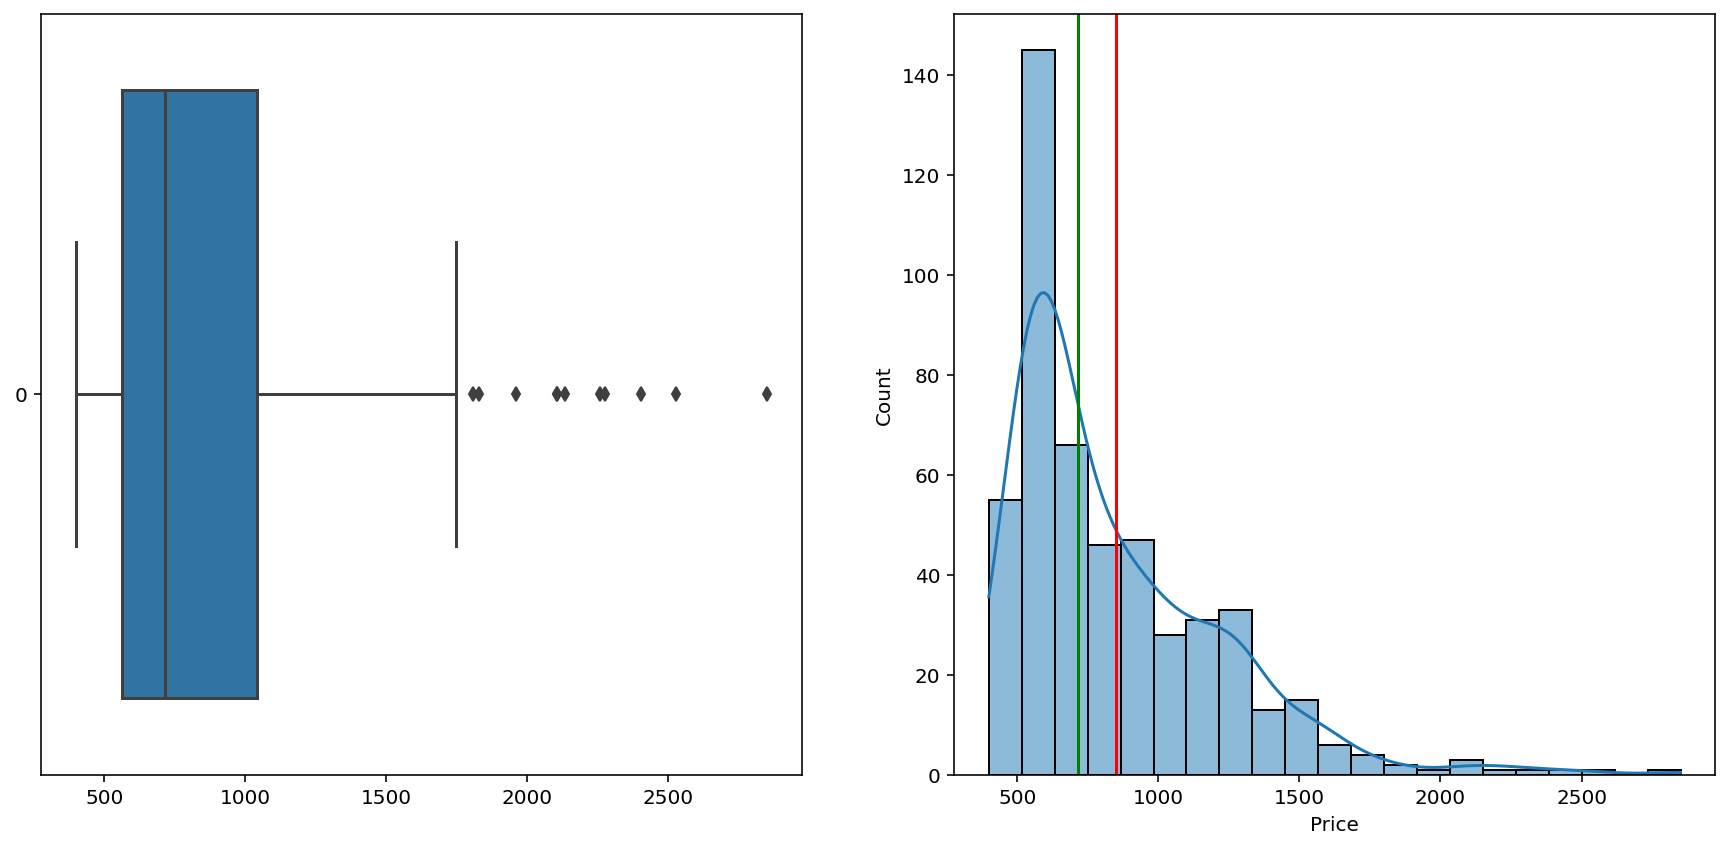

In [24]:
#price column

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.boxplot(Data.Price,orient="h")
plt.subplot(122)
sns.histplot(Data.Price,kde=True)
plt.axvline(Data.Price.mean(),color="red")
plt.axvline(Data.Price.median(),color="green");

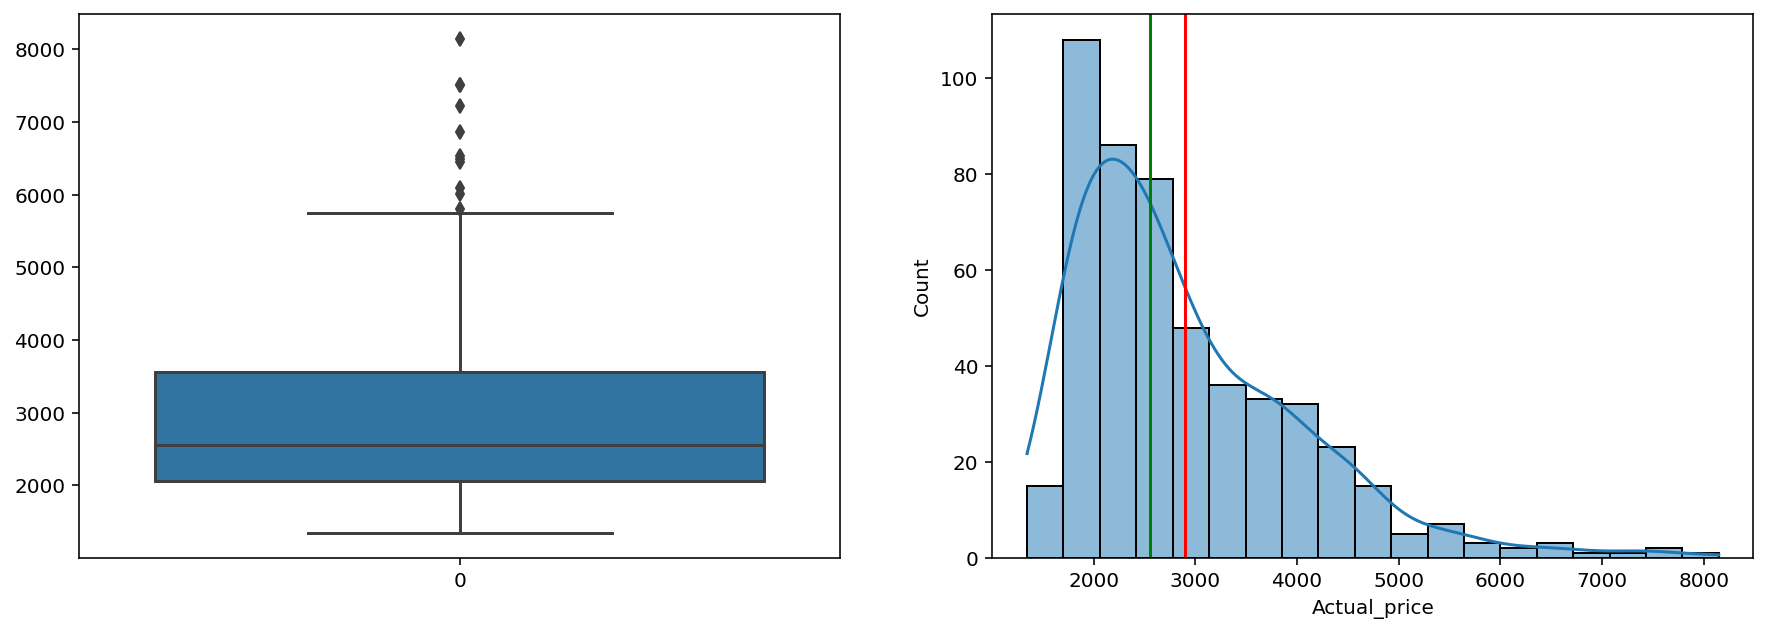

In [25]:
#actual price

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(Data.Actual_price)
plt.subplot(122)
sns.histplot(Data.Actual_price,kde=True)
plt.axvline(Data.Actual_price.mean(),color="red")
plt.axvline(Data.Actual_price.median(),color="green");

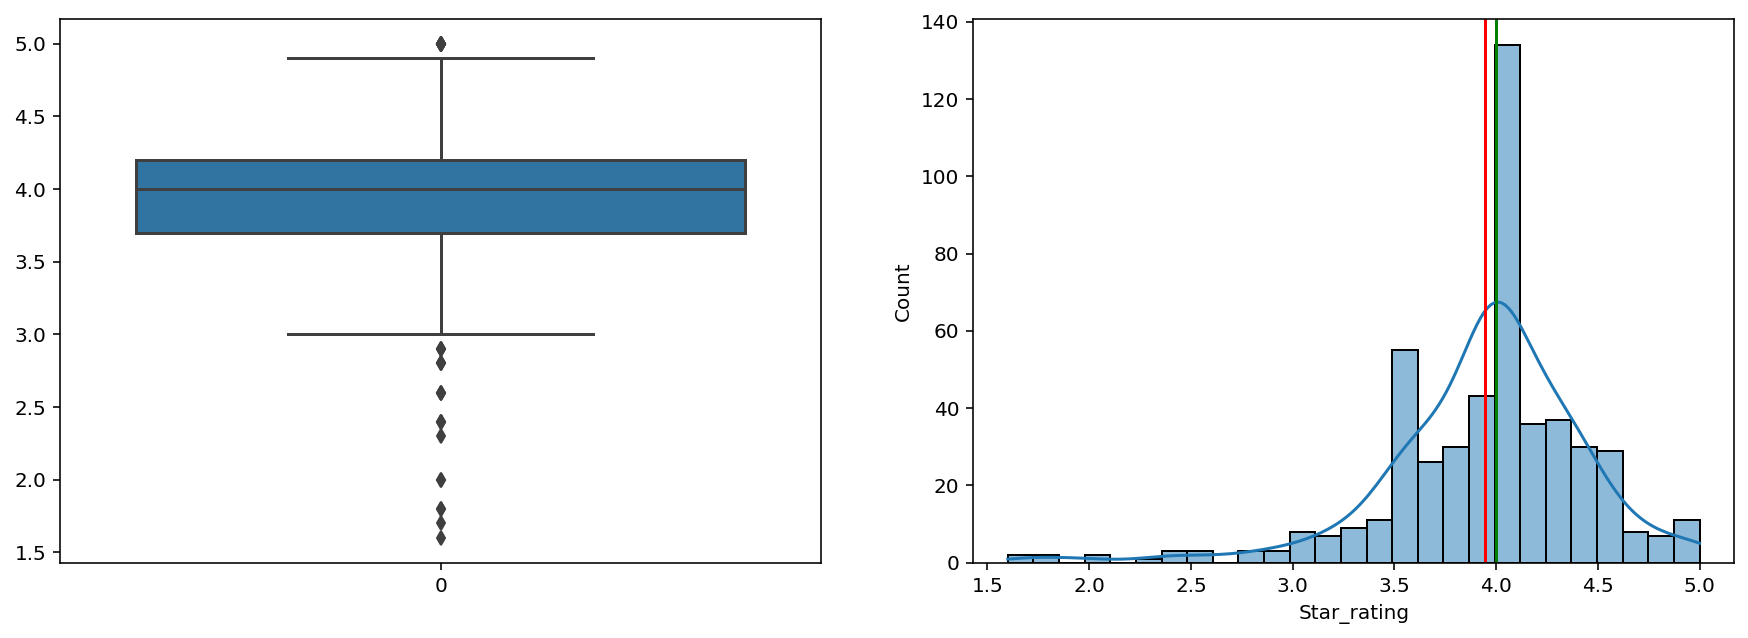

In [26]:
#Star_rating

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(Data.Star_rating)
plt.subplot(122)
sns.histplot(Data.Star_rating,kde=True)
plt.axvline(Data.Star_rating.mean(),color="red")
plt.axvline(Data.Star_rating.median(),color="green");

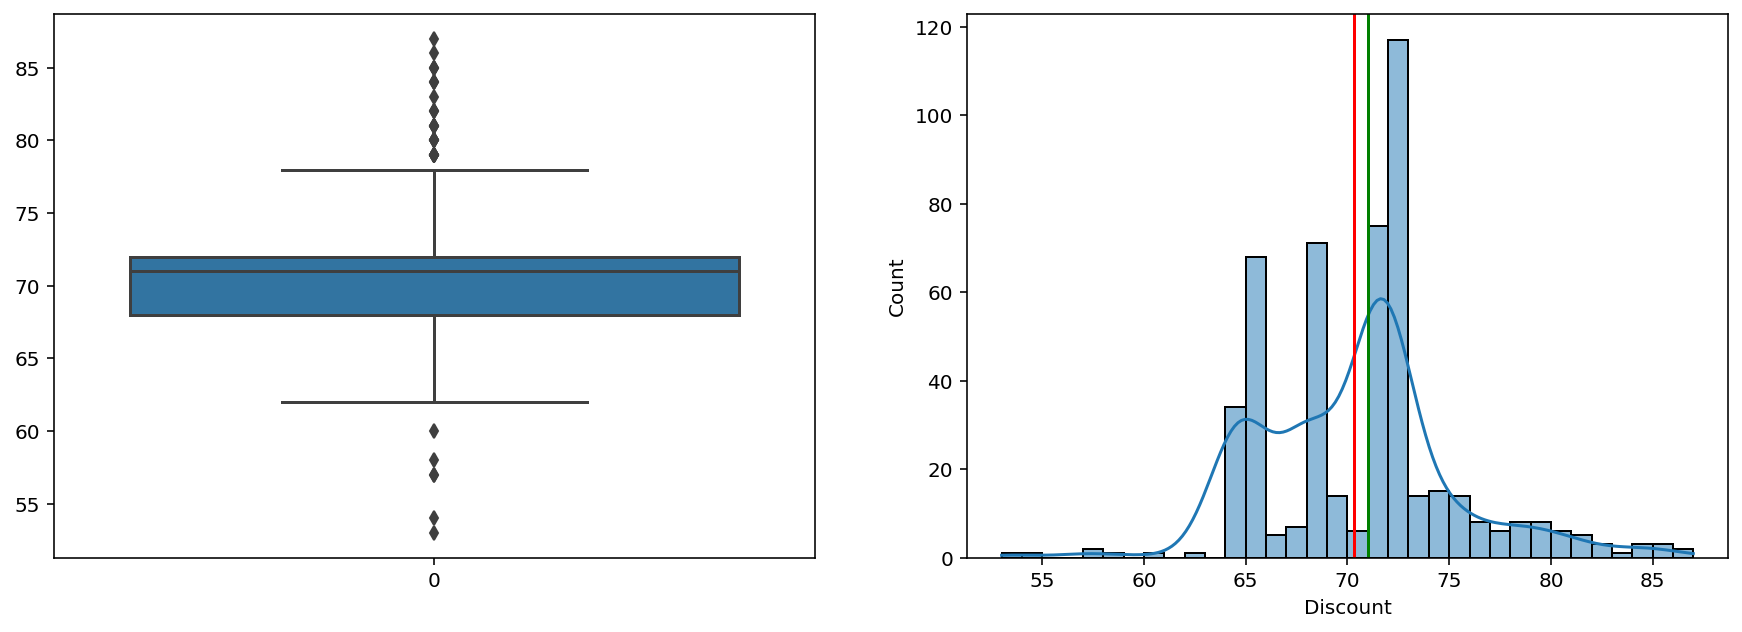

In [27]:
#Discount

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(Data.Discount)
plt.subplot(122)
sns.histplot(Data.Discount,kde=True)
plt.axvline(Data.Discount.mean(),color="red")
plt.axvline(Data.Discount.median(),color="green");

## Treating the outliers

In [28]:
Q1, Q2,Q3= (Data.Price.quantile(q = [0.25,0.5,0.75]))

In [29]:
print(Q1,Q2,Q3)

564.0 714.0 1042.75


In [30]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


478.75 1760.875 -154.125


In [31]:
Data[(Data.Price > UL) | (Data.Price < LL)]

,City,Hotel_name,Location,Reviews,Star_rating,Actual_price,Discount,Price
352,hyderabad,Townhouse OAK Hotel Belsons Taj Mahal,"Near Swapnalok Complex, Patny Centre, Hyderabad",Good,4.4,6528,72,1828
358,hyderabad,OYO Townhouse 164 ESI Hospital,"Sanath Nagar, Hyderabad",Very Good,4.5,6869,65,2404
362,hyderabad,OYO Townhouse 359 Begumpet,"Vinn Hospital, Begumpet, Hyderabad",Very Good,4.4,7222,65,2528
375,hyderabad,OYO Townhouse RCC Majestic 397 LB Nagar,"Champapet, Hyderabad",Fair,4.7,8147,65,2851
391,hyderabad,Collection O 42514 Banjara Hills,"Near Aasha hospital, Venkat Nagar, Hyderabad",Good,4.3,6497,65,2274
419,kolkata,Townhouse OAK Kzar Corporate Hotel,"Sealdah - Entally, Kolkata",Very Good,4.5,7514,72,2104
423,kolkata,Townhouse OAK Kzar Corporate Hotel,"Sealdah - Entally, Kolkata",Fair,4.5,7514,72,2104
431,kolkata,OYO Townhouse 1050 Centre Point Inn,Esplanade Row East Beside K. c Das Sweet Espla...,Very Good,4.3,6097,65,2134
434,kolkata,Townhouse OAK Kzar Select,"700017, Kolkata",Excellent,4.3,5594,65,1958
457,kolkata,Collection O 82694 Aafreen Tower,"Esplanade, Kolkata",Good,4.0,5159,64,1806


In [32]:
Data[(Data.Price > UL) | (Data.Price < LL)].index.tolist()

[352, 358, 362, 375, 391, 419, 423, 431, 434, 457, 494]

### Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm=MinMaxScaler()
data_Norm=mm.fit_transform(Data.Price.values.reshape(-1,1))

<AxesSubplot:>

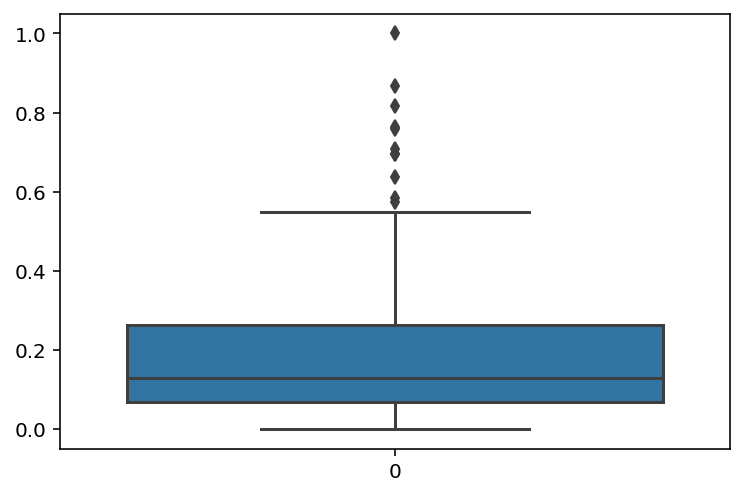

In [34]:
sns.boxplot(data_Norm)

### Standardization

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=StandardScaler()
data_Stand=mm.fit_transform(Data.Price.values.reshape(-1,1))

<AxesSubplot:>

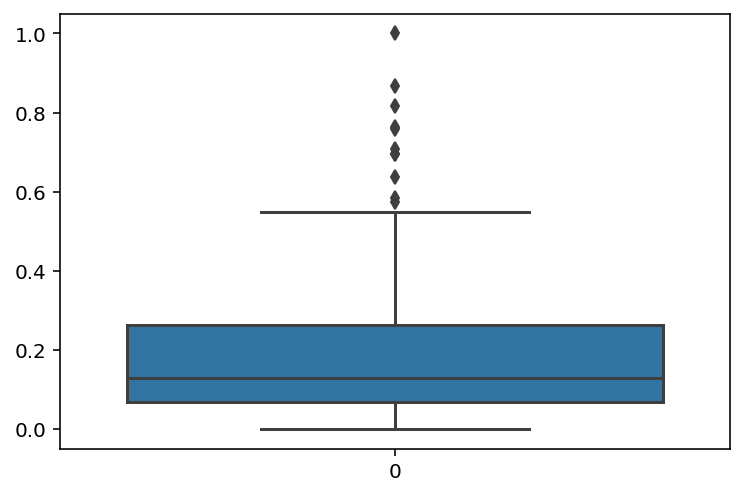

In [36]:
sns.boxplot(data_Stand)

### log transformation


In [37]:
np.log(Data.Price)

0      6.395262
1      6.242223
2      6.645091
3      6.395262
4      6.308098
         ...   
495    6.694562
496    7.070724
497    6.887553
498    7.111512
499    6.833032
Name: Price, Length: 500, dtype: float64

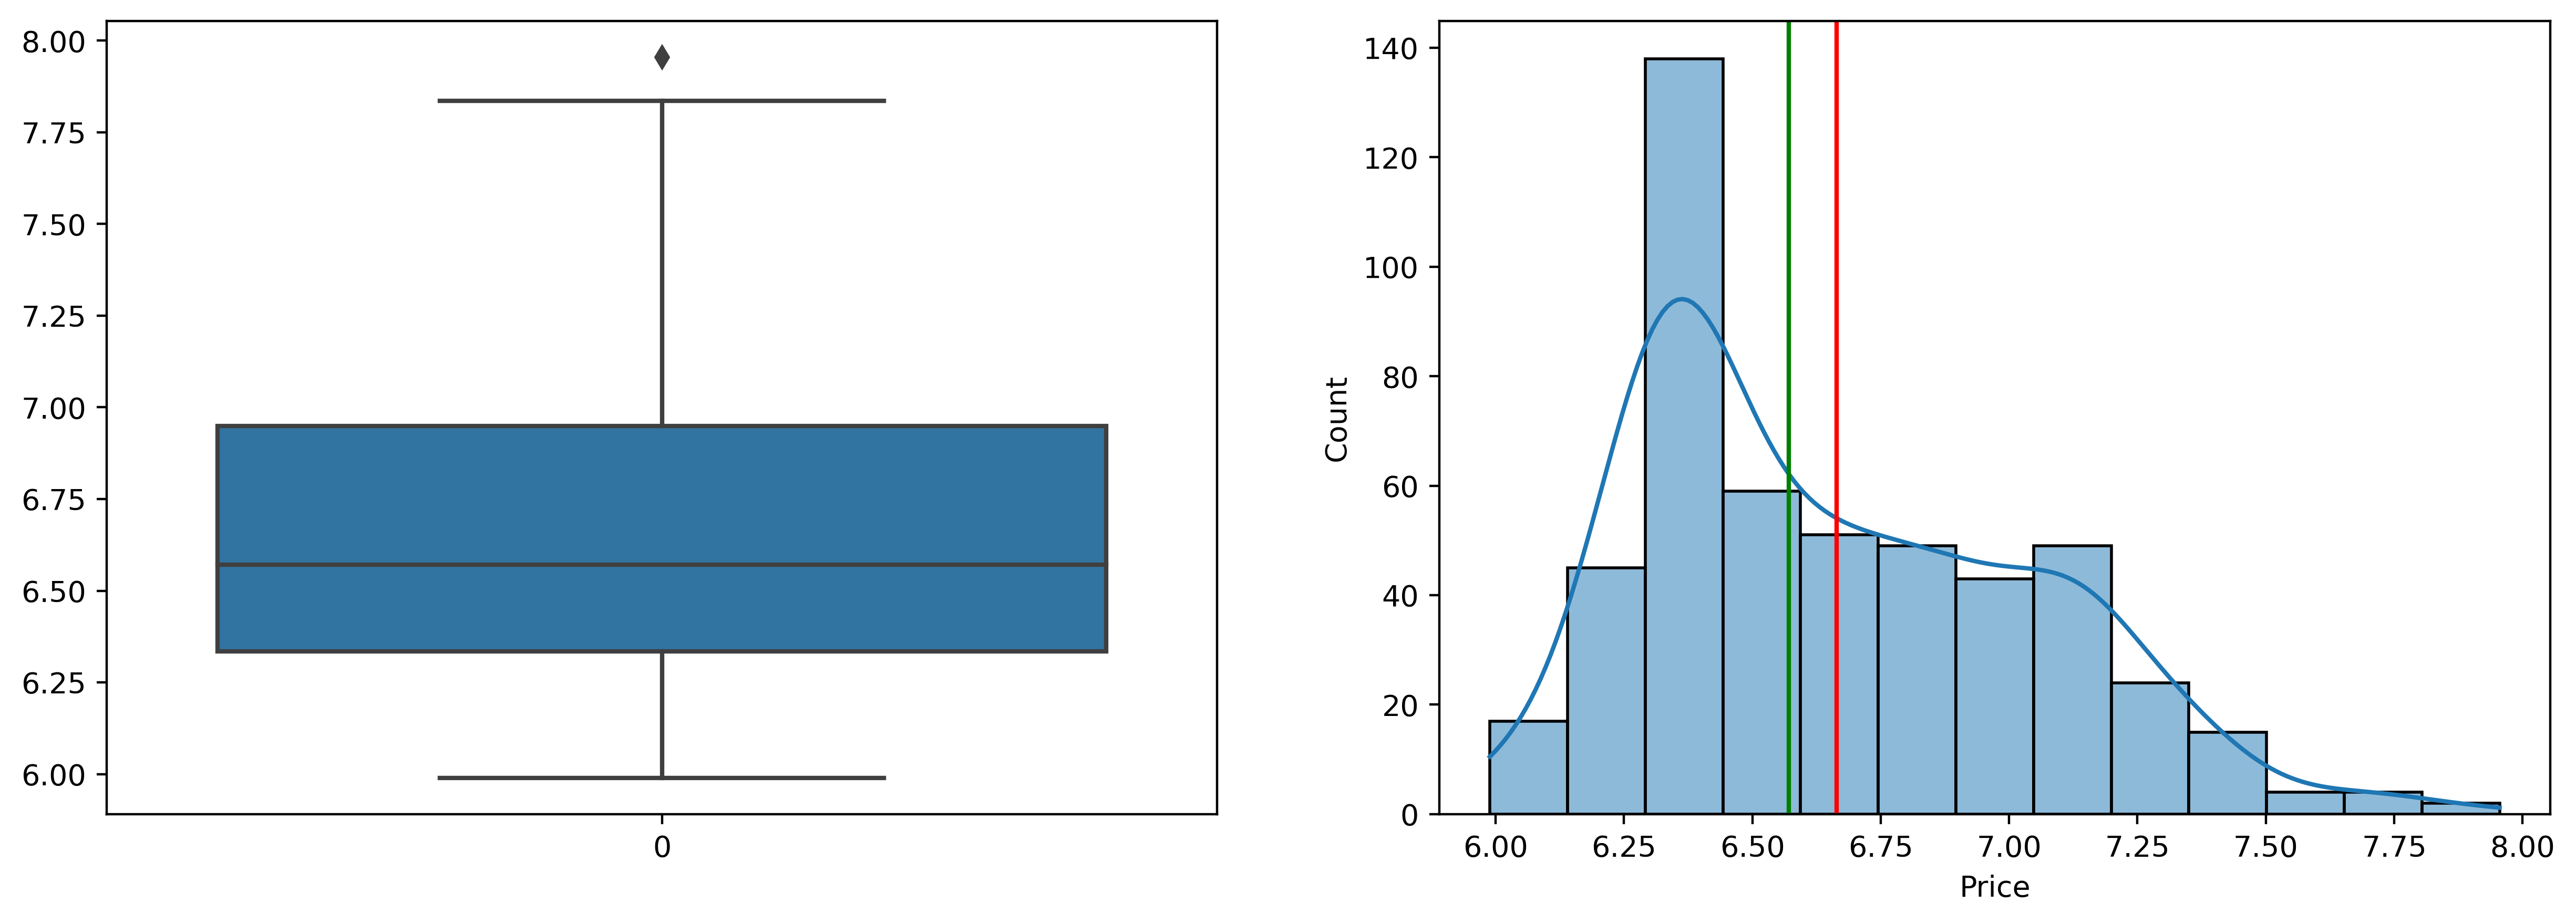

In [38]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.boxplot(np.log(Data.Price))
plt.subplot(122)
sns.histplot(np.log(Data.Price),kde=True)
plt.axvline((np.log(Data.Price)).mean(),color="red")
plt.axvline((np.log(Data.Price)).median(),color="green");

In [39]:
Q1, Q2,Q3= (np.log(Data.Price).quantile(q = [0.25,0.5,0.75]))

In [40]:
print(Q1,Q2,Q3)

6.335054251498059 6.570882962339584 6.949606336820802


In [41]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


0.6145520853227424 7.871434464804915 5.413226123513946


In [43]:
Data[(np.log(Data.Price) > UL) | (np.log(Data.Price )< LL)].index.tolist()

[375]

### cuberoot transformation

In [44]:
(Data.Price)**(1/3)

0       8.429638
1       8.010403
2       9.161687
3       8.429638
4       8.188244
         ...    
495     9.314019
496    10.558255
497     9.932884
498    10.702786
499     9.753998
Name: Price, Length: 500, dtype: float64

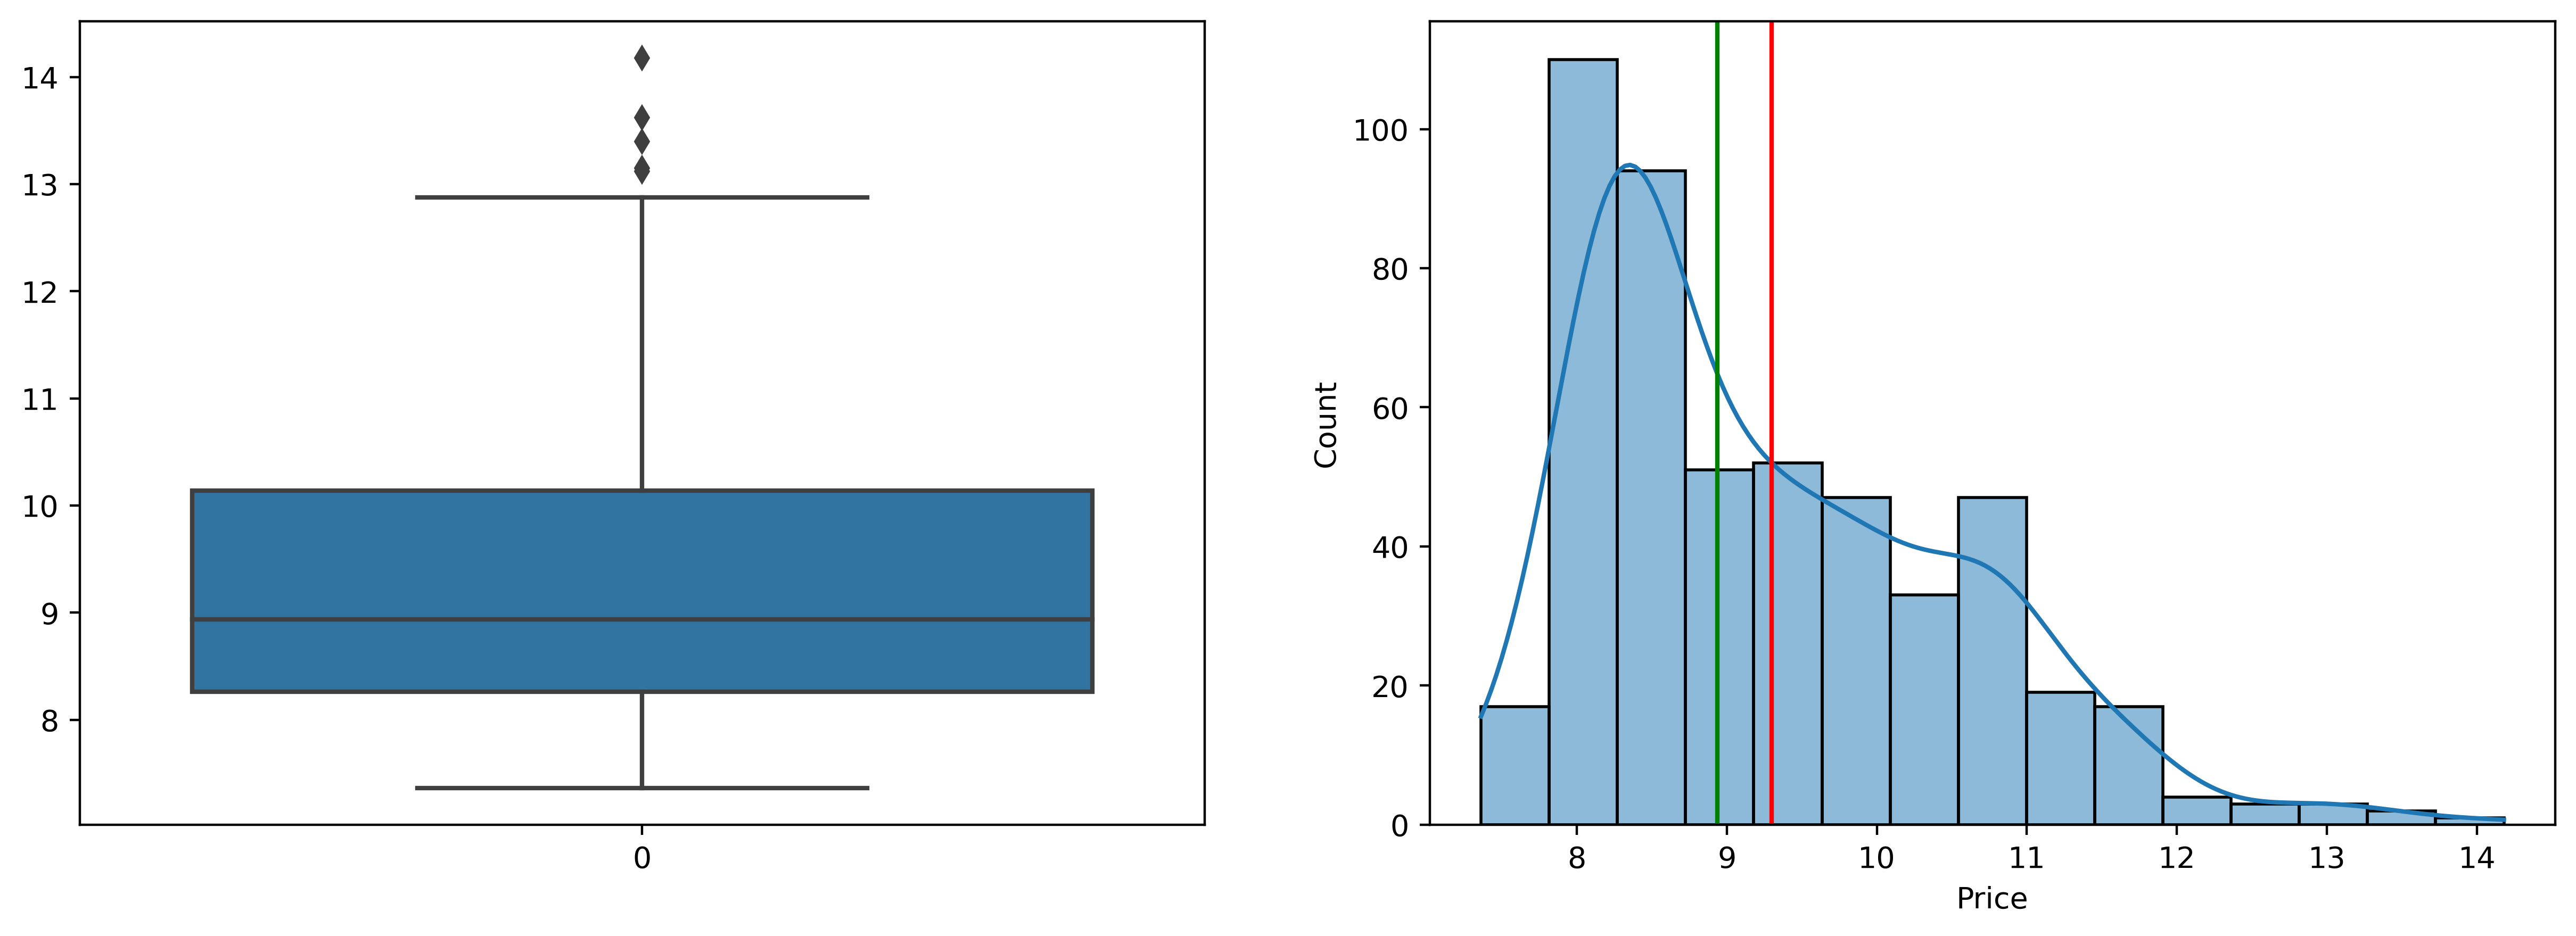

In [45]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.boxplot((Data.Price)**(1/3))
plt.subplot(122)
sns.histplot((Data.Price)**(1/3),kde=True)
plt.axvline(((Data.Price)**(1/3)).mean(),color="red")
plt.axvline(((Data.Price)**(1/3)).median(),color="green");

In [46]:
Q1, Q2,Q3= (((Data.Price)**(1/3)).quantile(q = [0.25,0.5,0.75]))

In [47]:
print(Q1,Q2,Q3)

8.26214922566535 8.93784332063404 10.14049282851538


In [48]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

1.8783436028500304 12.958008232790426 5.444633821390305


In [49]:
Data[( ((Data.Price)**(1/3))> UL) | (((Data.Price)**(1/3))< LL)].index.tolist()

[358, 362, 375, 391, 494]

### boxcox transformation

In [50]:
from scipy import stats

In [51]:
stats.boxcox(Data.Price)

(array([1.24929218, 1.24828749, 1.25069088, 1.24929218, 1.24873499,
        1.24918754, 1.24946303, 1.24997896, 1.24989422, 1.24924026,
        1.24951168, 1.24967197, 1.24848578, 1.25151248, 1.25214269,
        1.25204903, 1.25253338, 1.24929218, 1.25030403, 1.24854966,
        1.24804982, 1.25254248, 1.25322403, 1.24873499, 1.24804982,
        1.25290842, 1.24804982, 1.24967197, 1.24816345, 1.24873499,
        1.25253338, 1.24885357, 1.24980715, 1.24864965, 1.24816345,
        1.25005332, 1.25249655, 1.24989422, 1.2523884 , 1.24863729,
        1.25222544, 1.25285256, 1.24951168, 1.24924026, 1.24729223,
        1.25092431, 1.24873499, 1.25214269, 1.24885357, 1.24885357,
        1.24891145, 1.2483813 , 1.25278162, 1.24885357, 1.25273555,
        1.24807853, 1.25204903, 1.25140921, 1.251983  , 1.25030403,
        1.24821907, 1.24799176, 1.24885357, 1.25146384, 1.24929218,
        1.24982476, 1.24946303, 1.25085695, 1.24809281, 1.24873499,
        1.25068429, 1.25130148, 1.25018908, 1.24

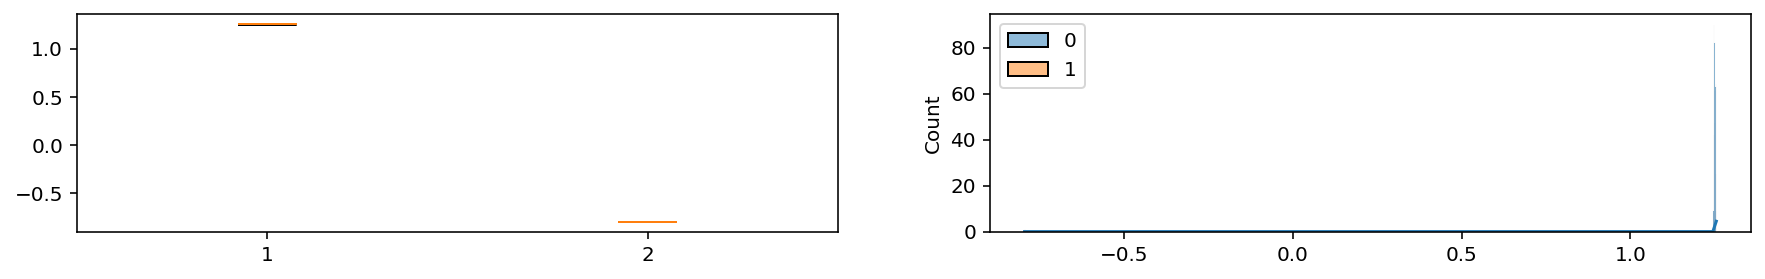

In [52]:
plt.figure(figsize=(15,2))
plt.subplot(121)
plt.boxplot(stats.boxcox(Data.Price))
plt.subplot(122)
sns.histplot(stats.boxcox(Data.Price),kde=True);

In [53]:
#since applying log transformation has resulted in minimum number of outliers,
#this method would be recommended for the outliers treatment

# Visulaization

## Univariate Analysis

### Pie-chart to display Reviews

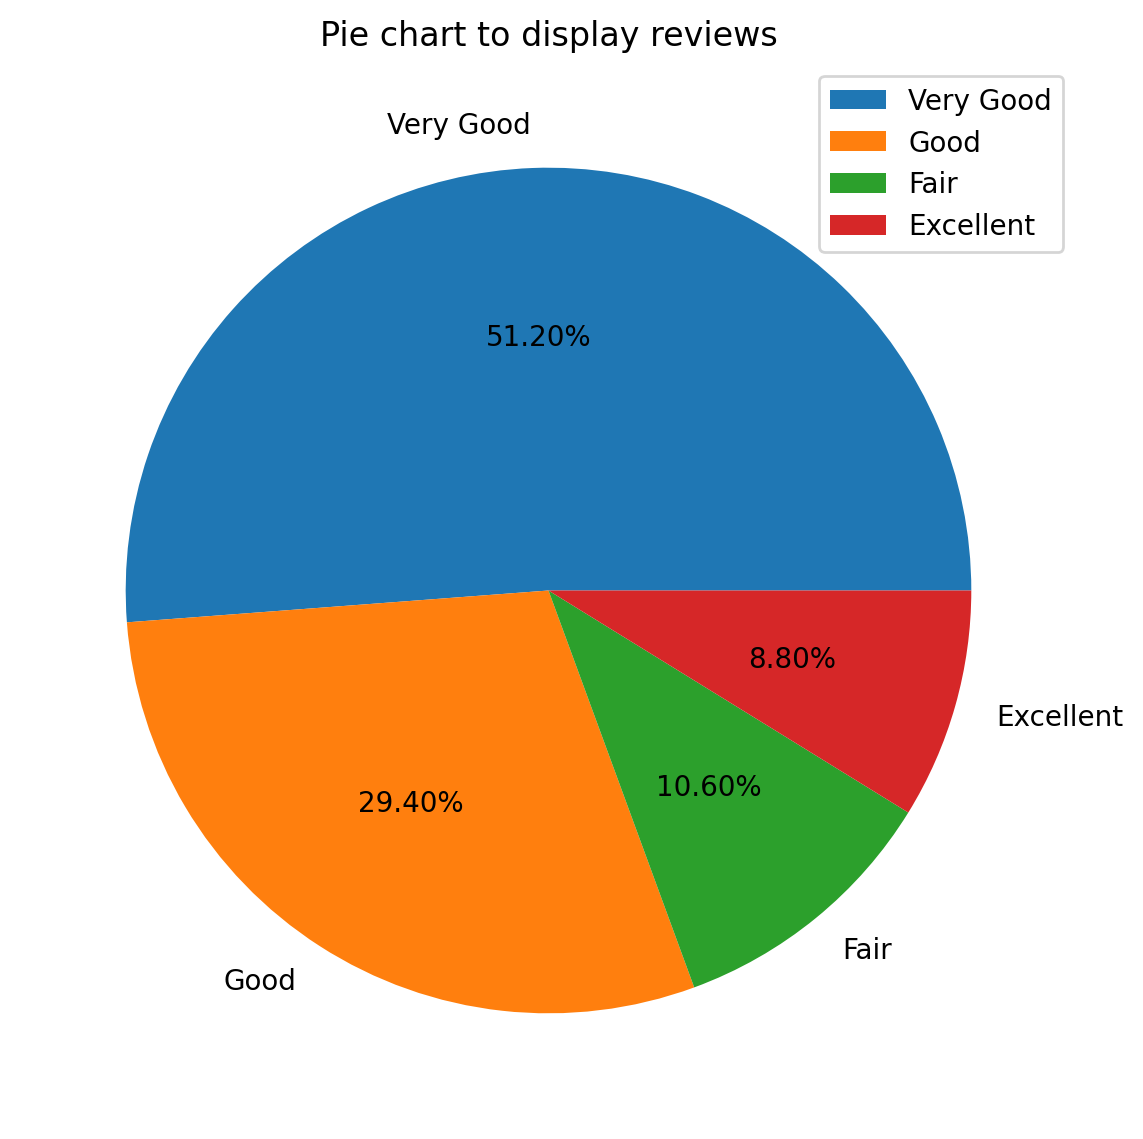

In [54]:
plt.figure(figsize=(7,7),dpi=100)
plt.pie(x=Data.Reviews.value_counts().values,labels=Data.Reviews.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart to display reviews")
plt.legend(loc='upper right');

In [55]:
#The pie-chart clearly shows that largest proportion of customers reviewed OYO hotels as 'Very Good', 
#while the review 'Excellent' was given by least number of customers. 
#The review 'Good' was also provided by decent percentage of people.  

### Histogram on Star_rating

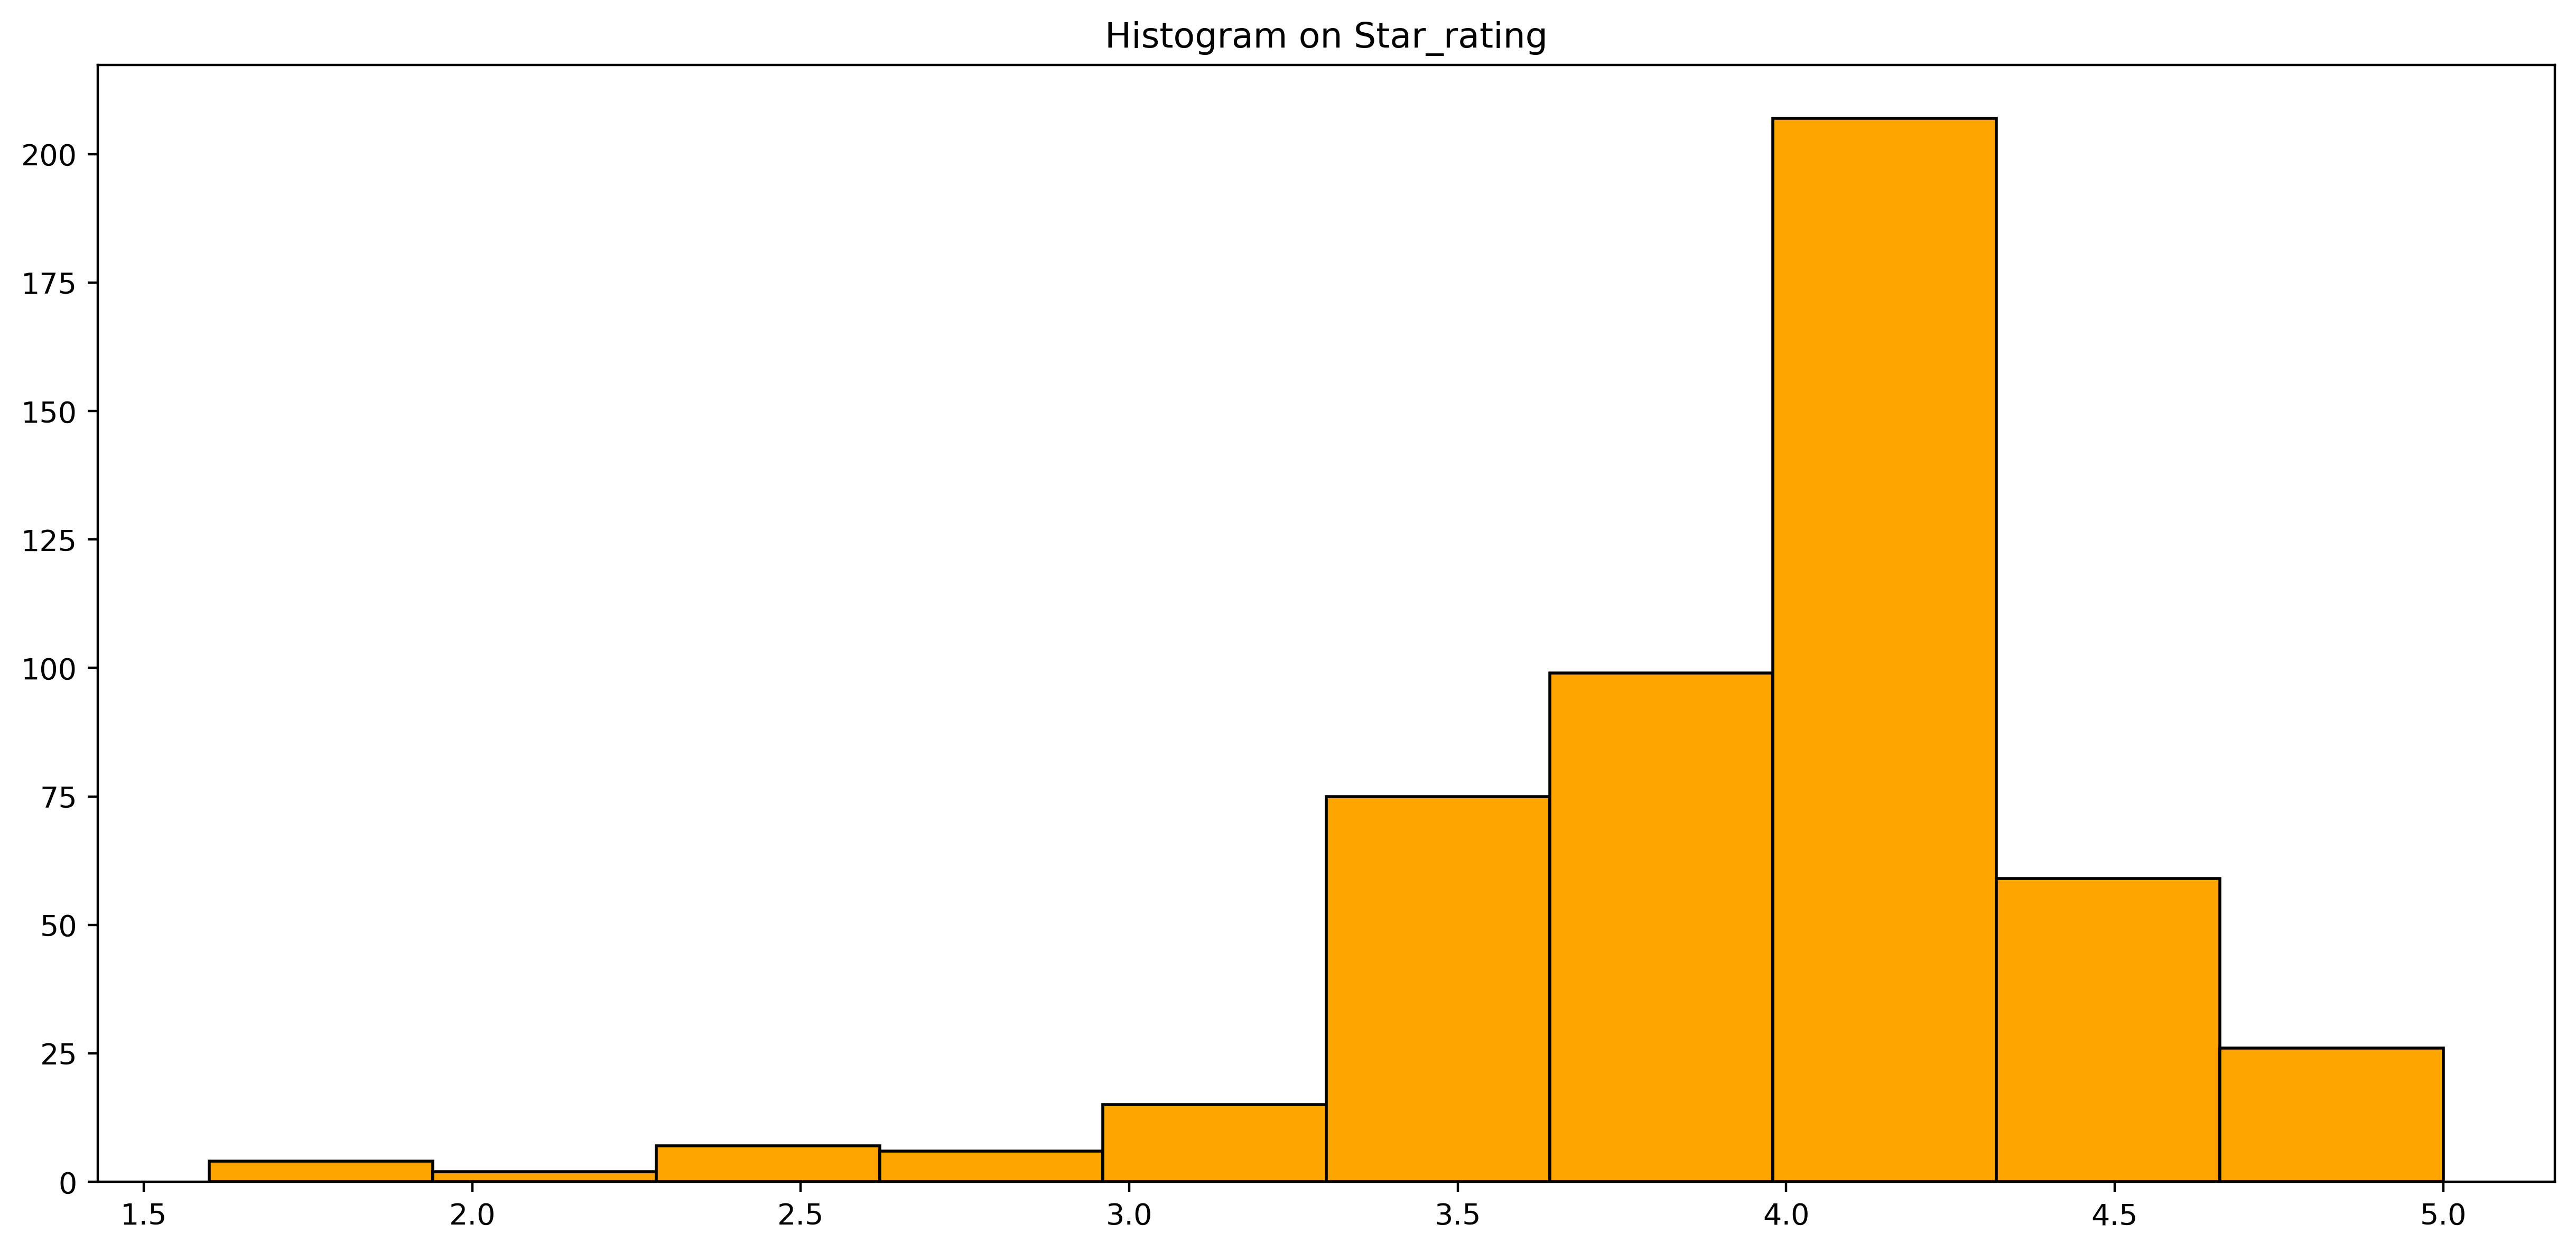

In [58]:
plt.figure(figsize=(15,7),dpi=200)
plt.hist(Data.Star_rating,color="orange",edgecolor="black")
plt.title("Histogram on Star_rating");

In [232]:
# The Histogram above was plotted based on the count of star ratings. Evidently the ratings ranged from 1.6 to 5. 
# Maximum number of cutomers have given ratings '4' for the hotels. 
# least portion of customers rated '2'.
# A visibly fair number rated in range 3.5 to 4.5

## Bivariate Analysis

### Bar plot for comparison of City Vs Price

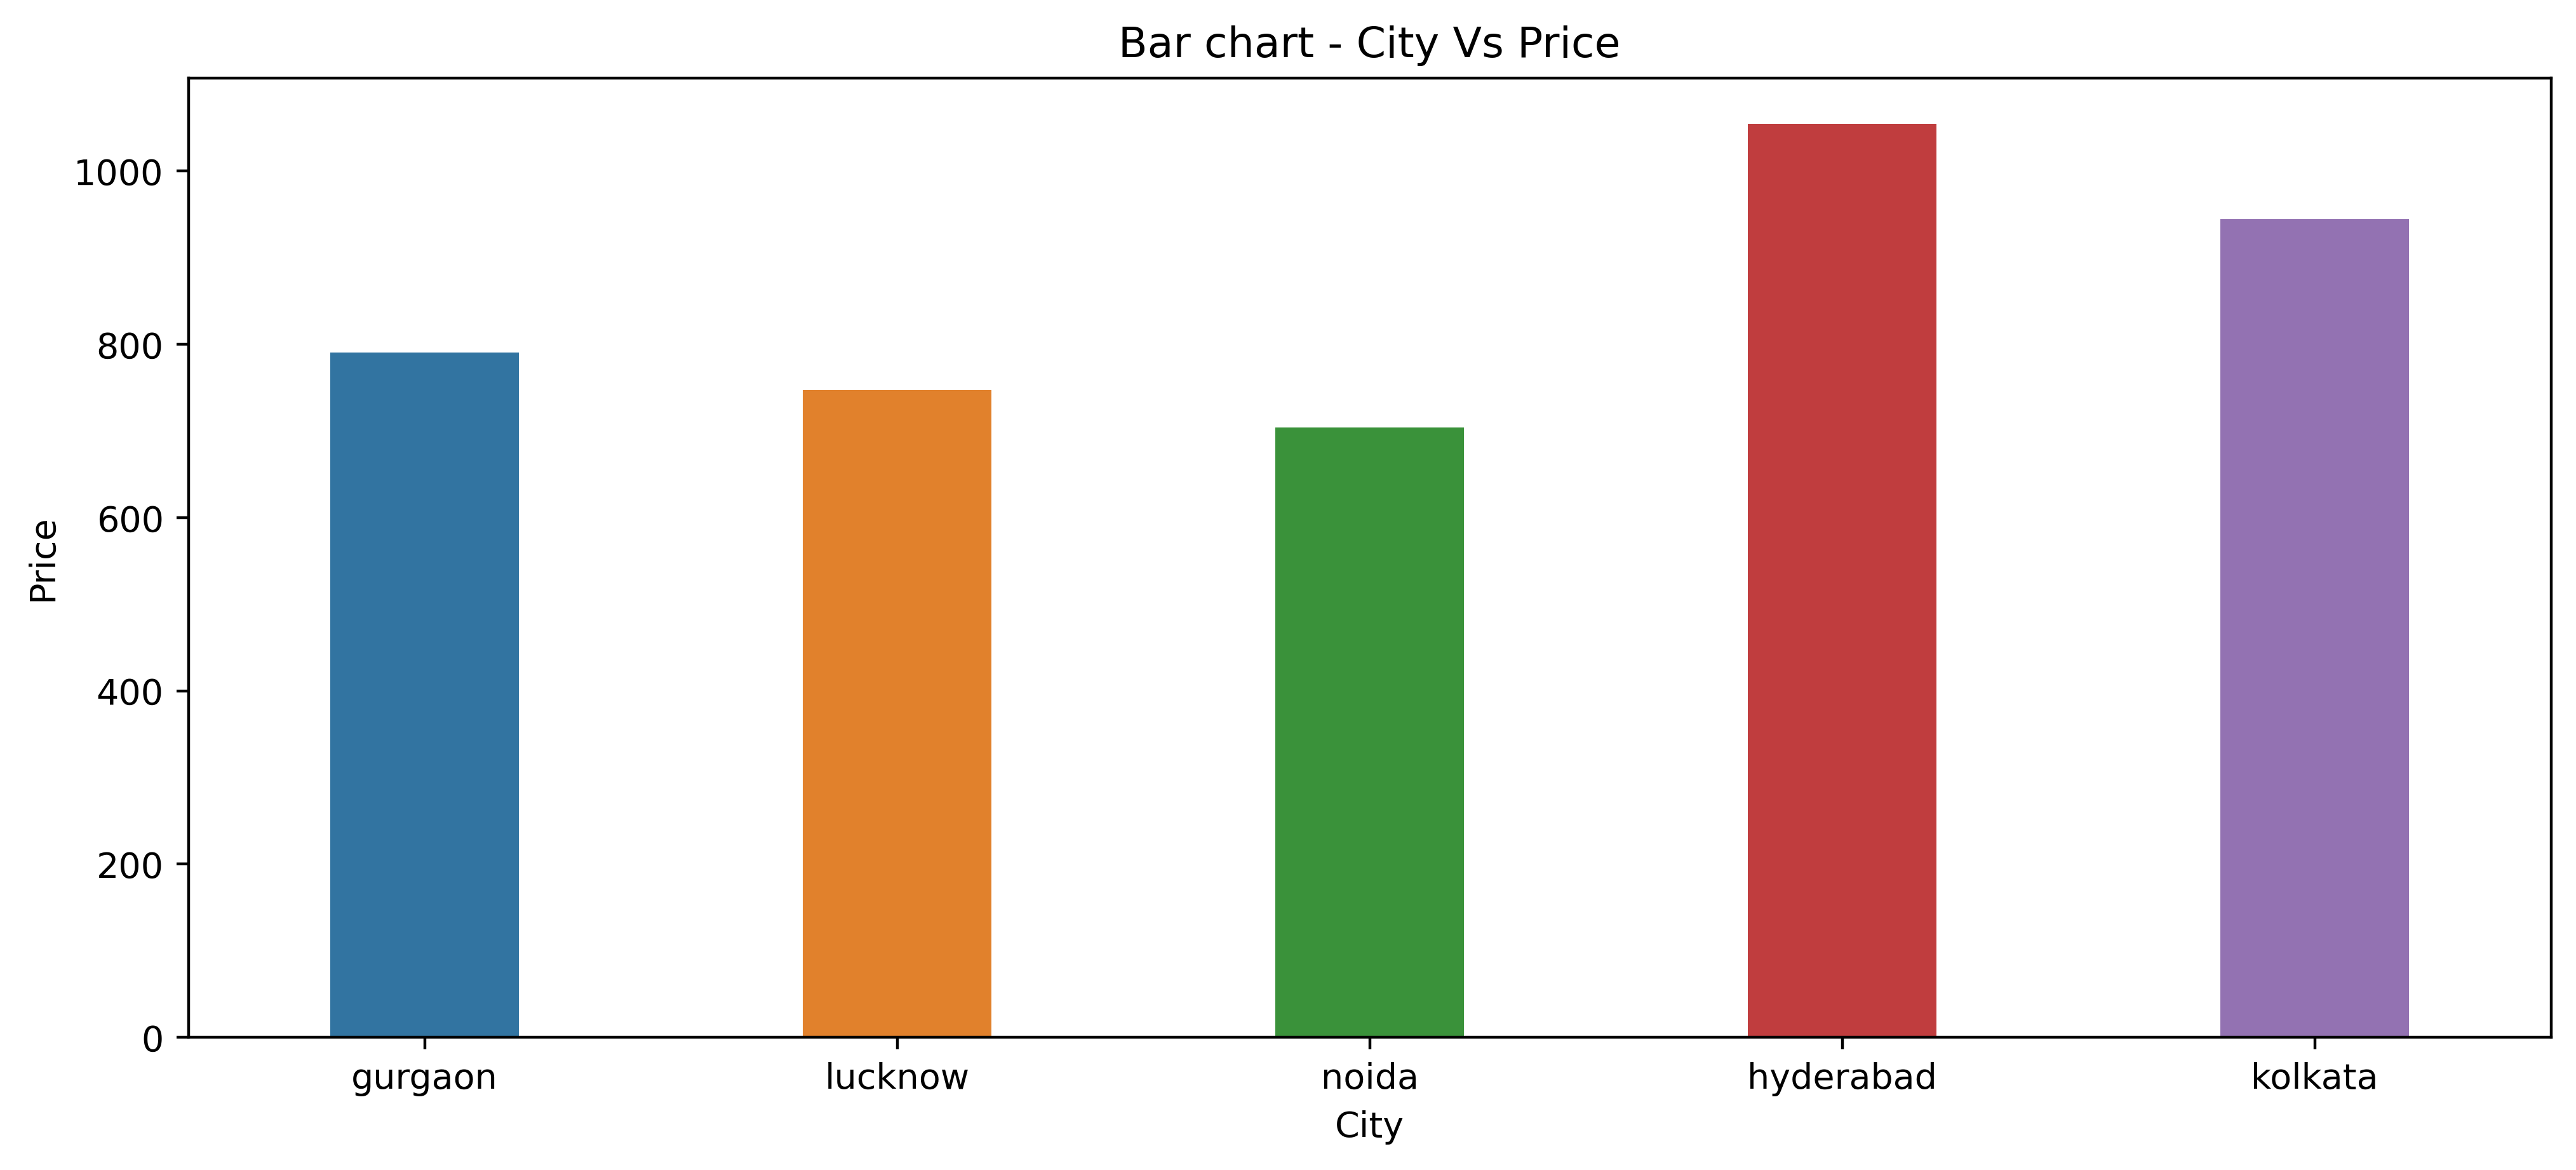

In [233]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="City",y="Price",data=Data,ci=False,width=0.4)
plt.title("Bar chart - City Vs Price")
plt.xlabel("City",fontsize=10,color="black")
plt.ylabel("Price",fontsize=10,color="black");

In [ ]:
# Evidently, the OYO hotels in Hyderabad city are quite expensive in comparison to the remaining four cities. 
# Noida offers relatively cheaper hotels.
# Only slight variation is observed in the prices of Gurgon and Lucknow.

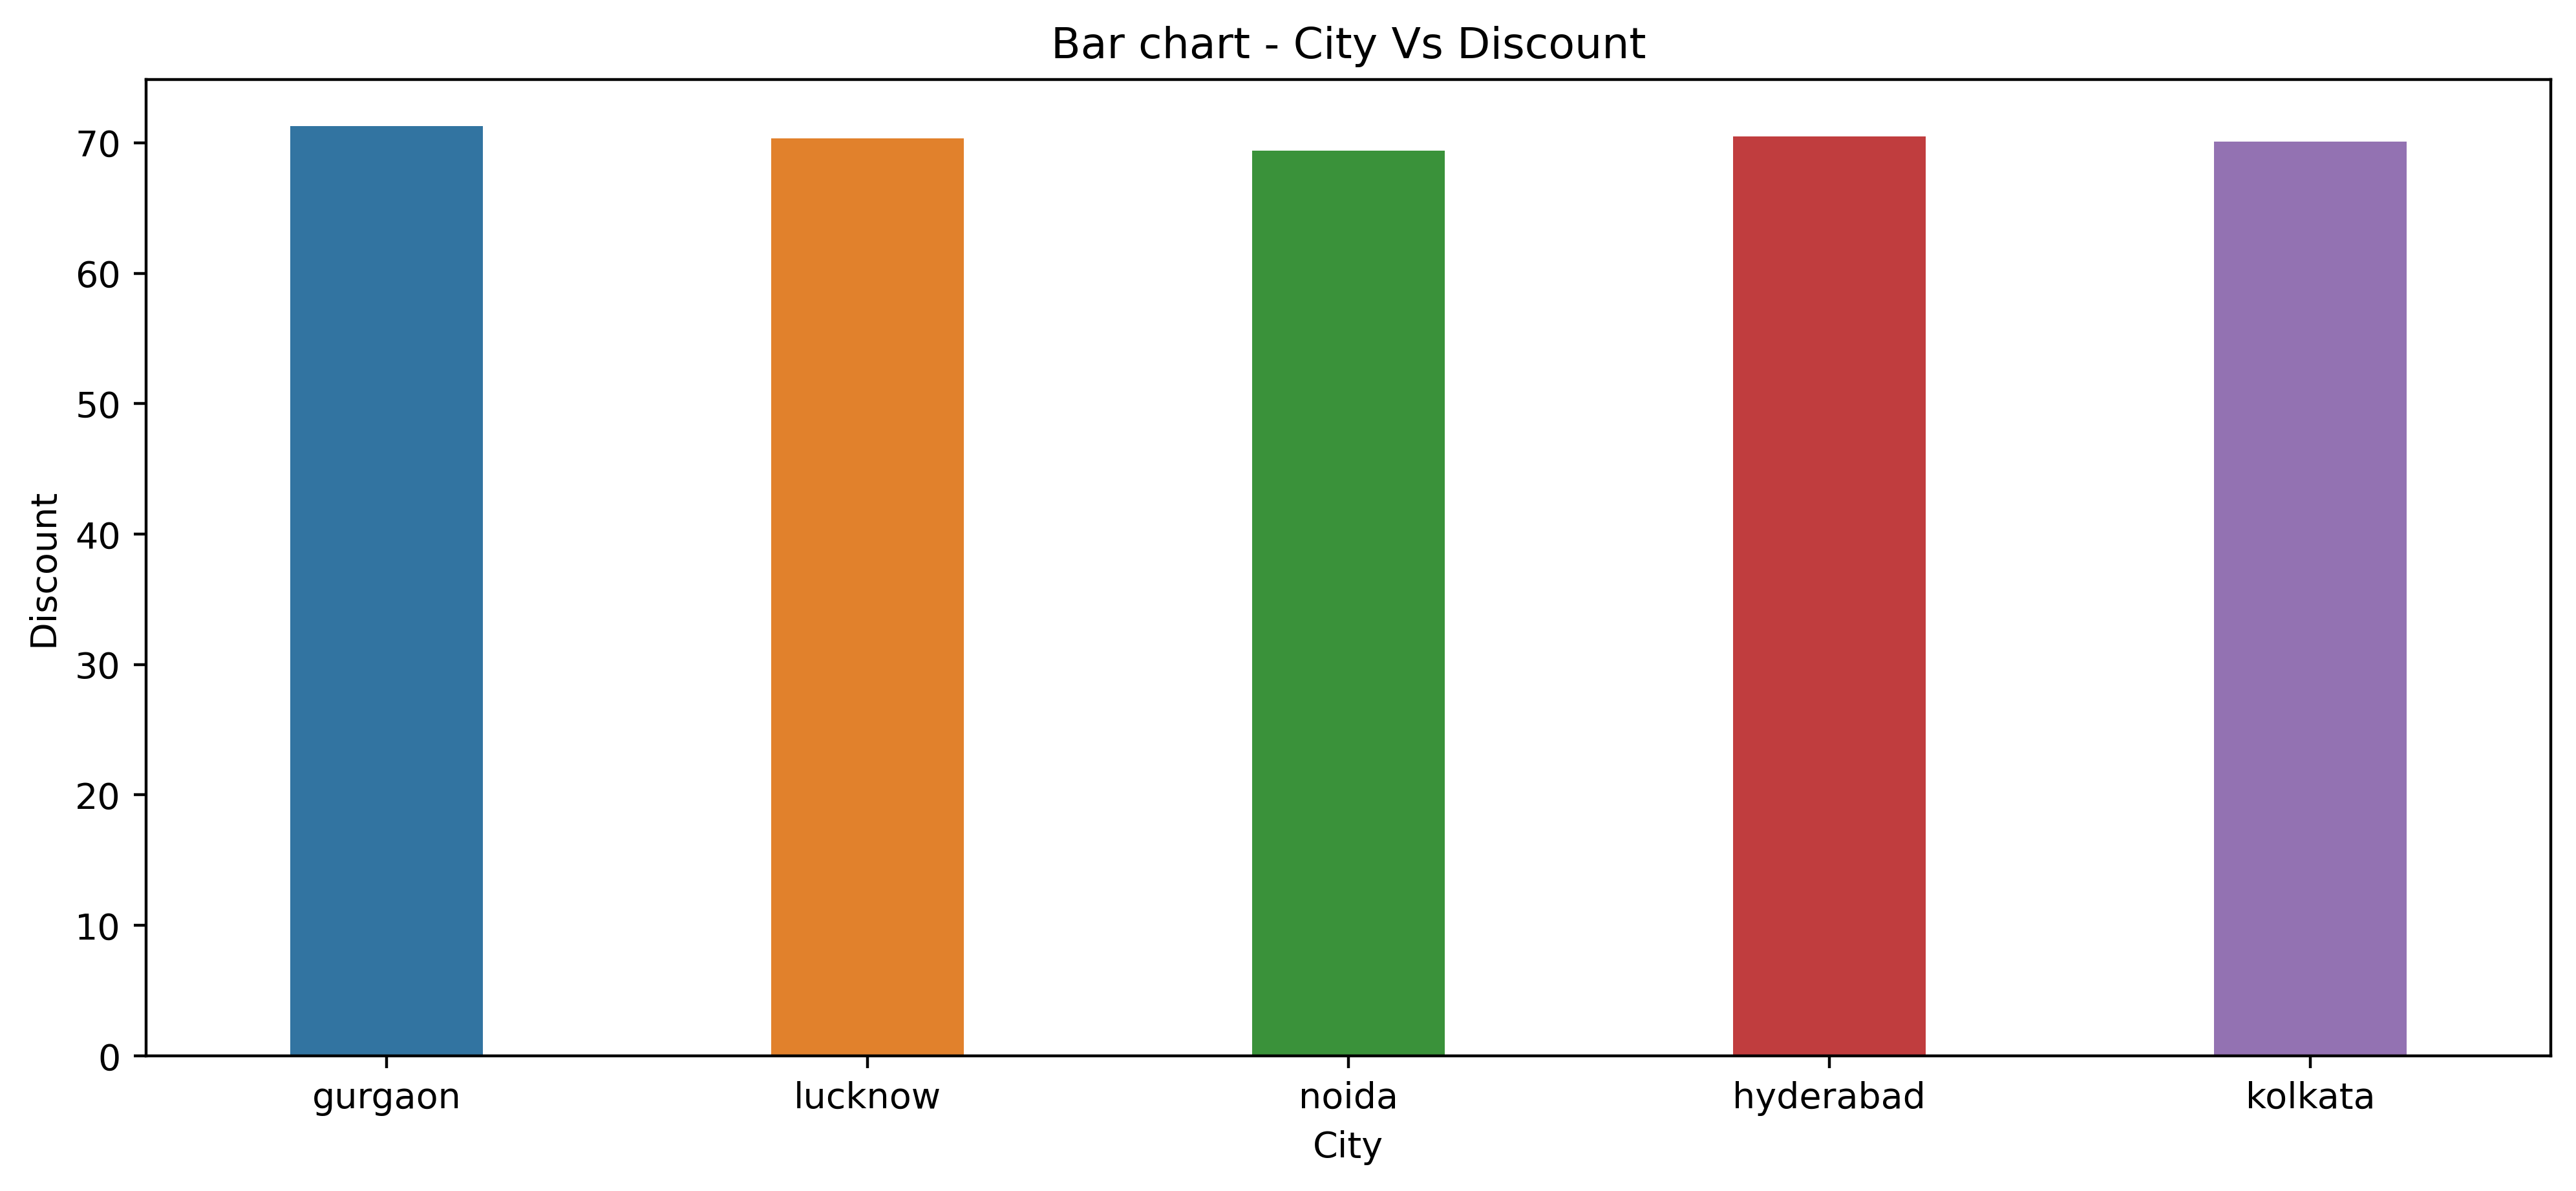

In [248]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x="City",y="Discount",data=Data,ci=False,width=0.4)
plt.title("Bar chart - City Vs Discount")
plt.xlabel("City",fontsize=10,color="black")
plt.ylabel("Discount",fontsize=10,color="black");

In [59]:
# There is no visible difference in the discounts offered by hotels at various cities

### Scatterplot  to observe relationship between price and star_rating

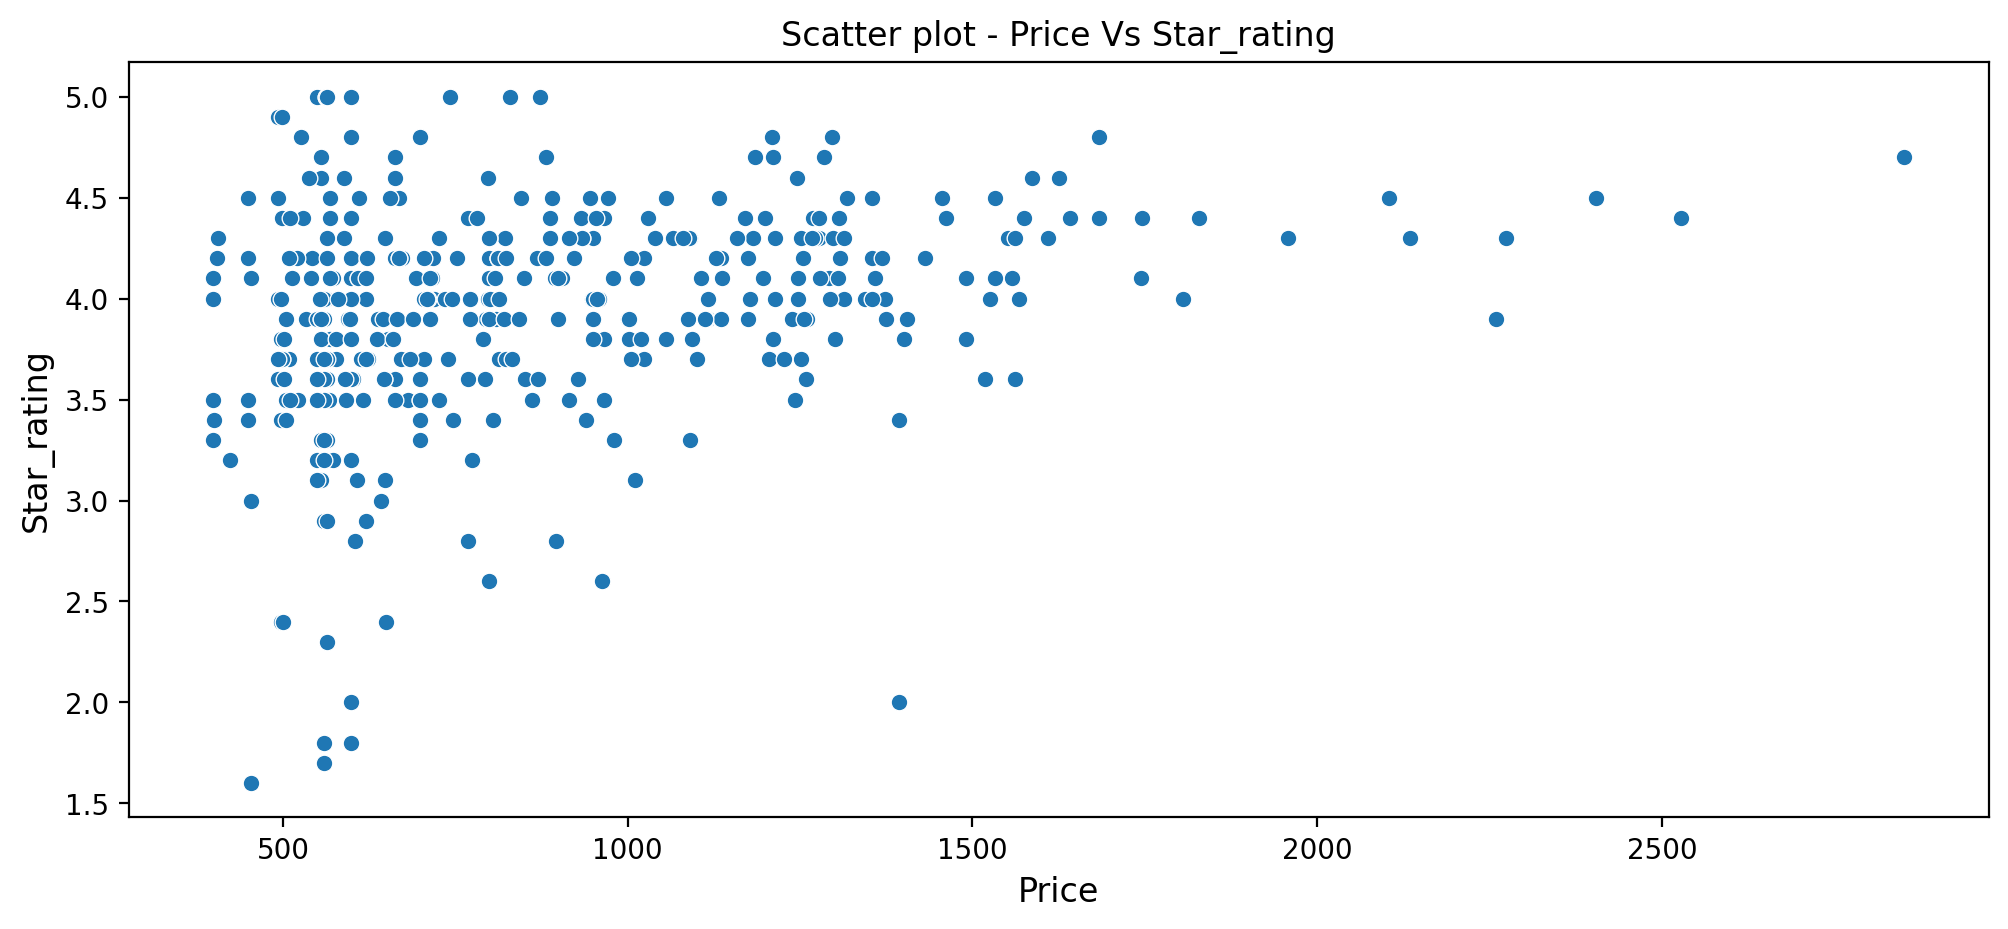

In [99]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(x="Price",y="Star_rating",data=Data)
plt.title("Scatter plot - Price Vs Star_rating")
plt.xlabel("Price",fontsize=12)
plt.ylabel("Star_rating",fontsize=12);

In [100]:
# The above scatter plot helps us to understand that there is no structured relationship between price and star_rating
# All hotels with low ratings are not necessarily cheaper, 
# and not all hotels with high ratings are not mandatorily expensive when compared. 

### Scatterplot  to observe relationship between Actual price and Price

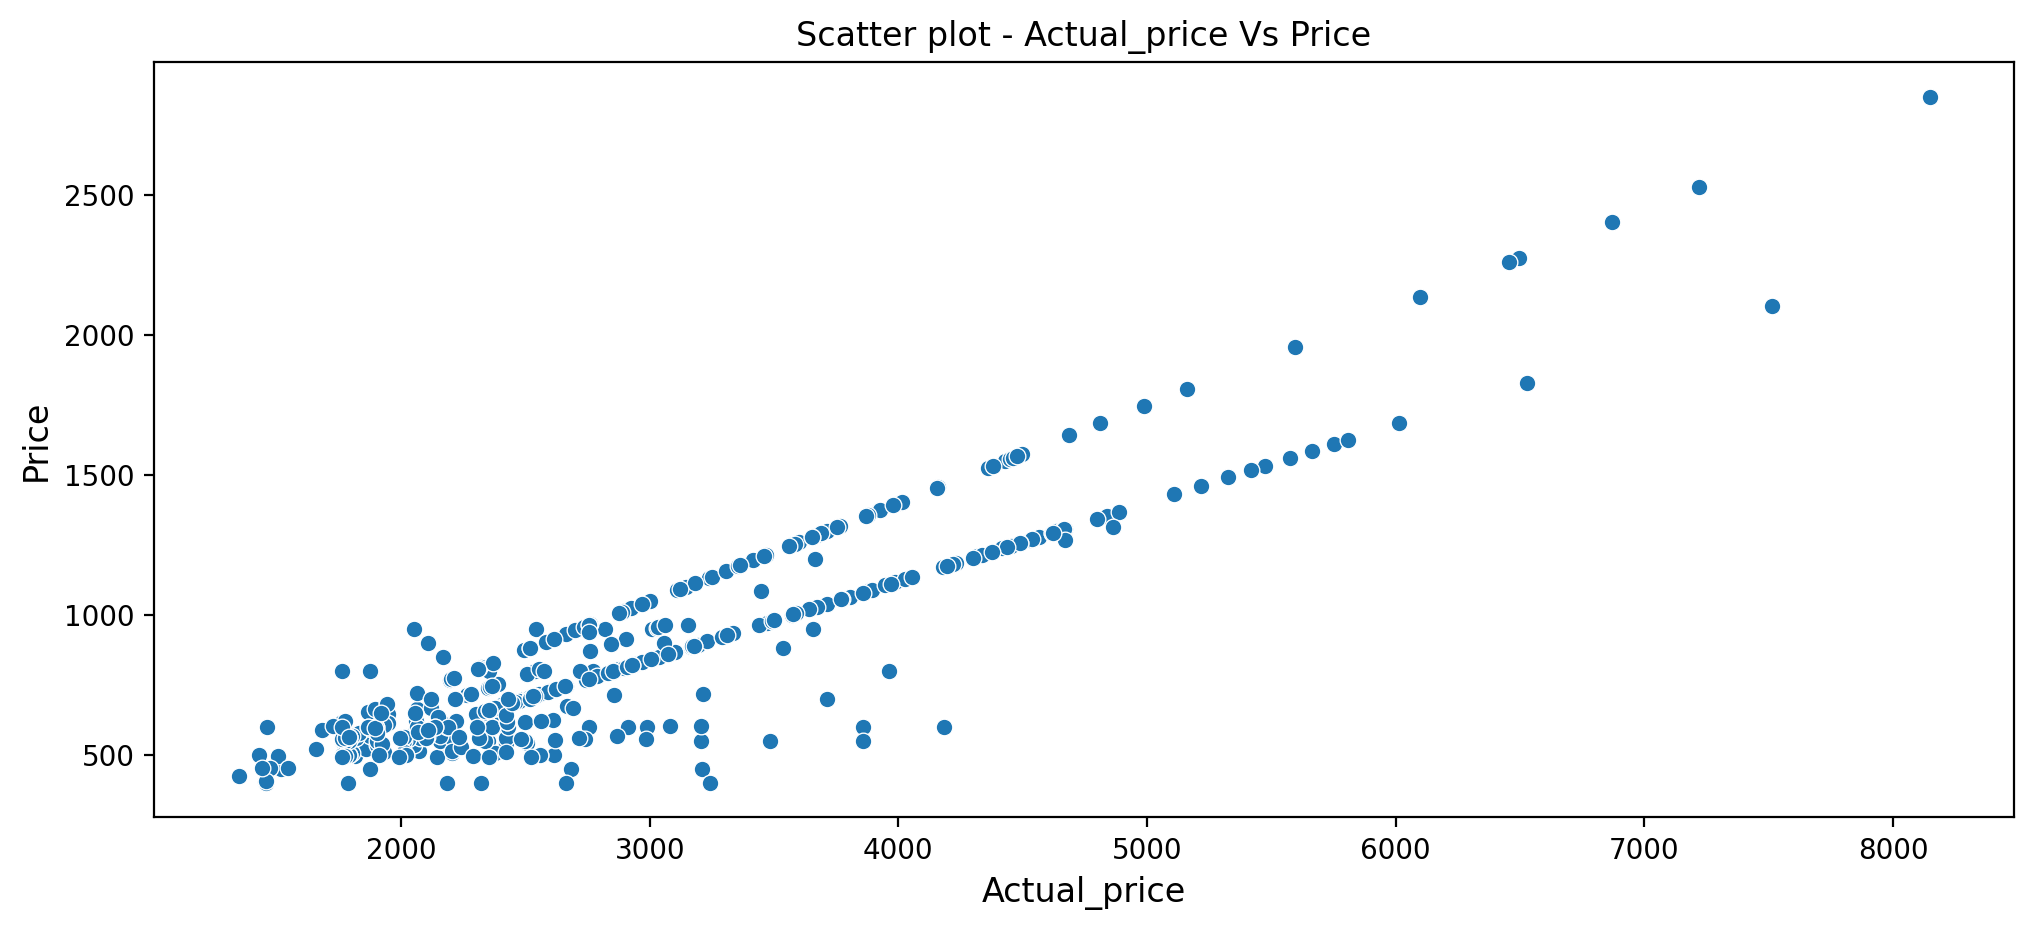

In [97]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(x="Actual_price",y="Price",data=Data)
plt.title("Scatter plot - Actual_price Vs Price")
plt.xlabel("Actual_price",fontsize=12)
plt.ylabel("Price",fontsize=12);

In [101]:
# There is a clear positive corelation between Actual price and Price. 
#However, there are a few deviations due to the discount factor

### Count plot  on City Vs Reviews

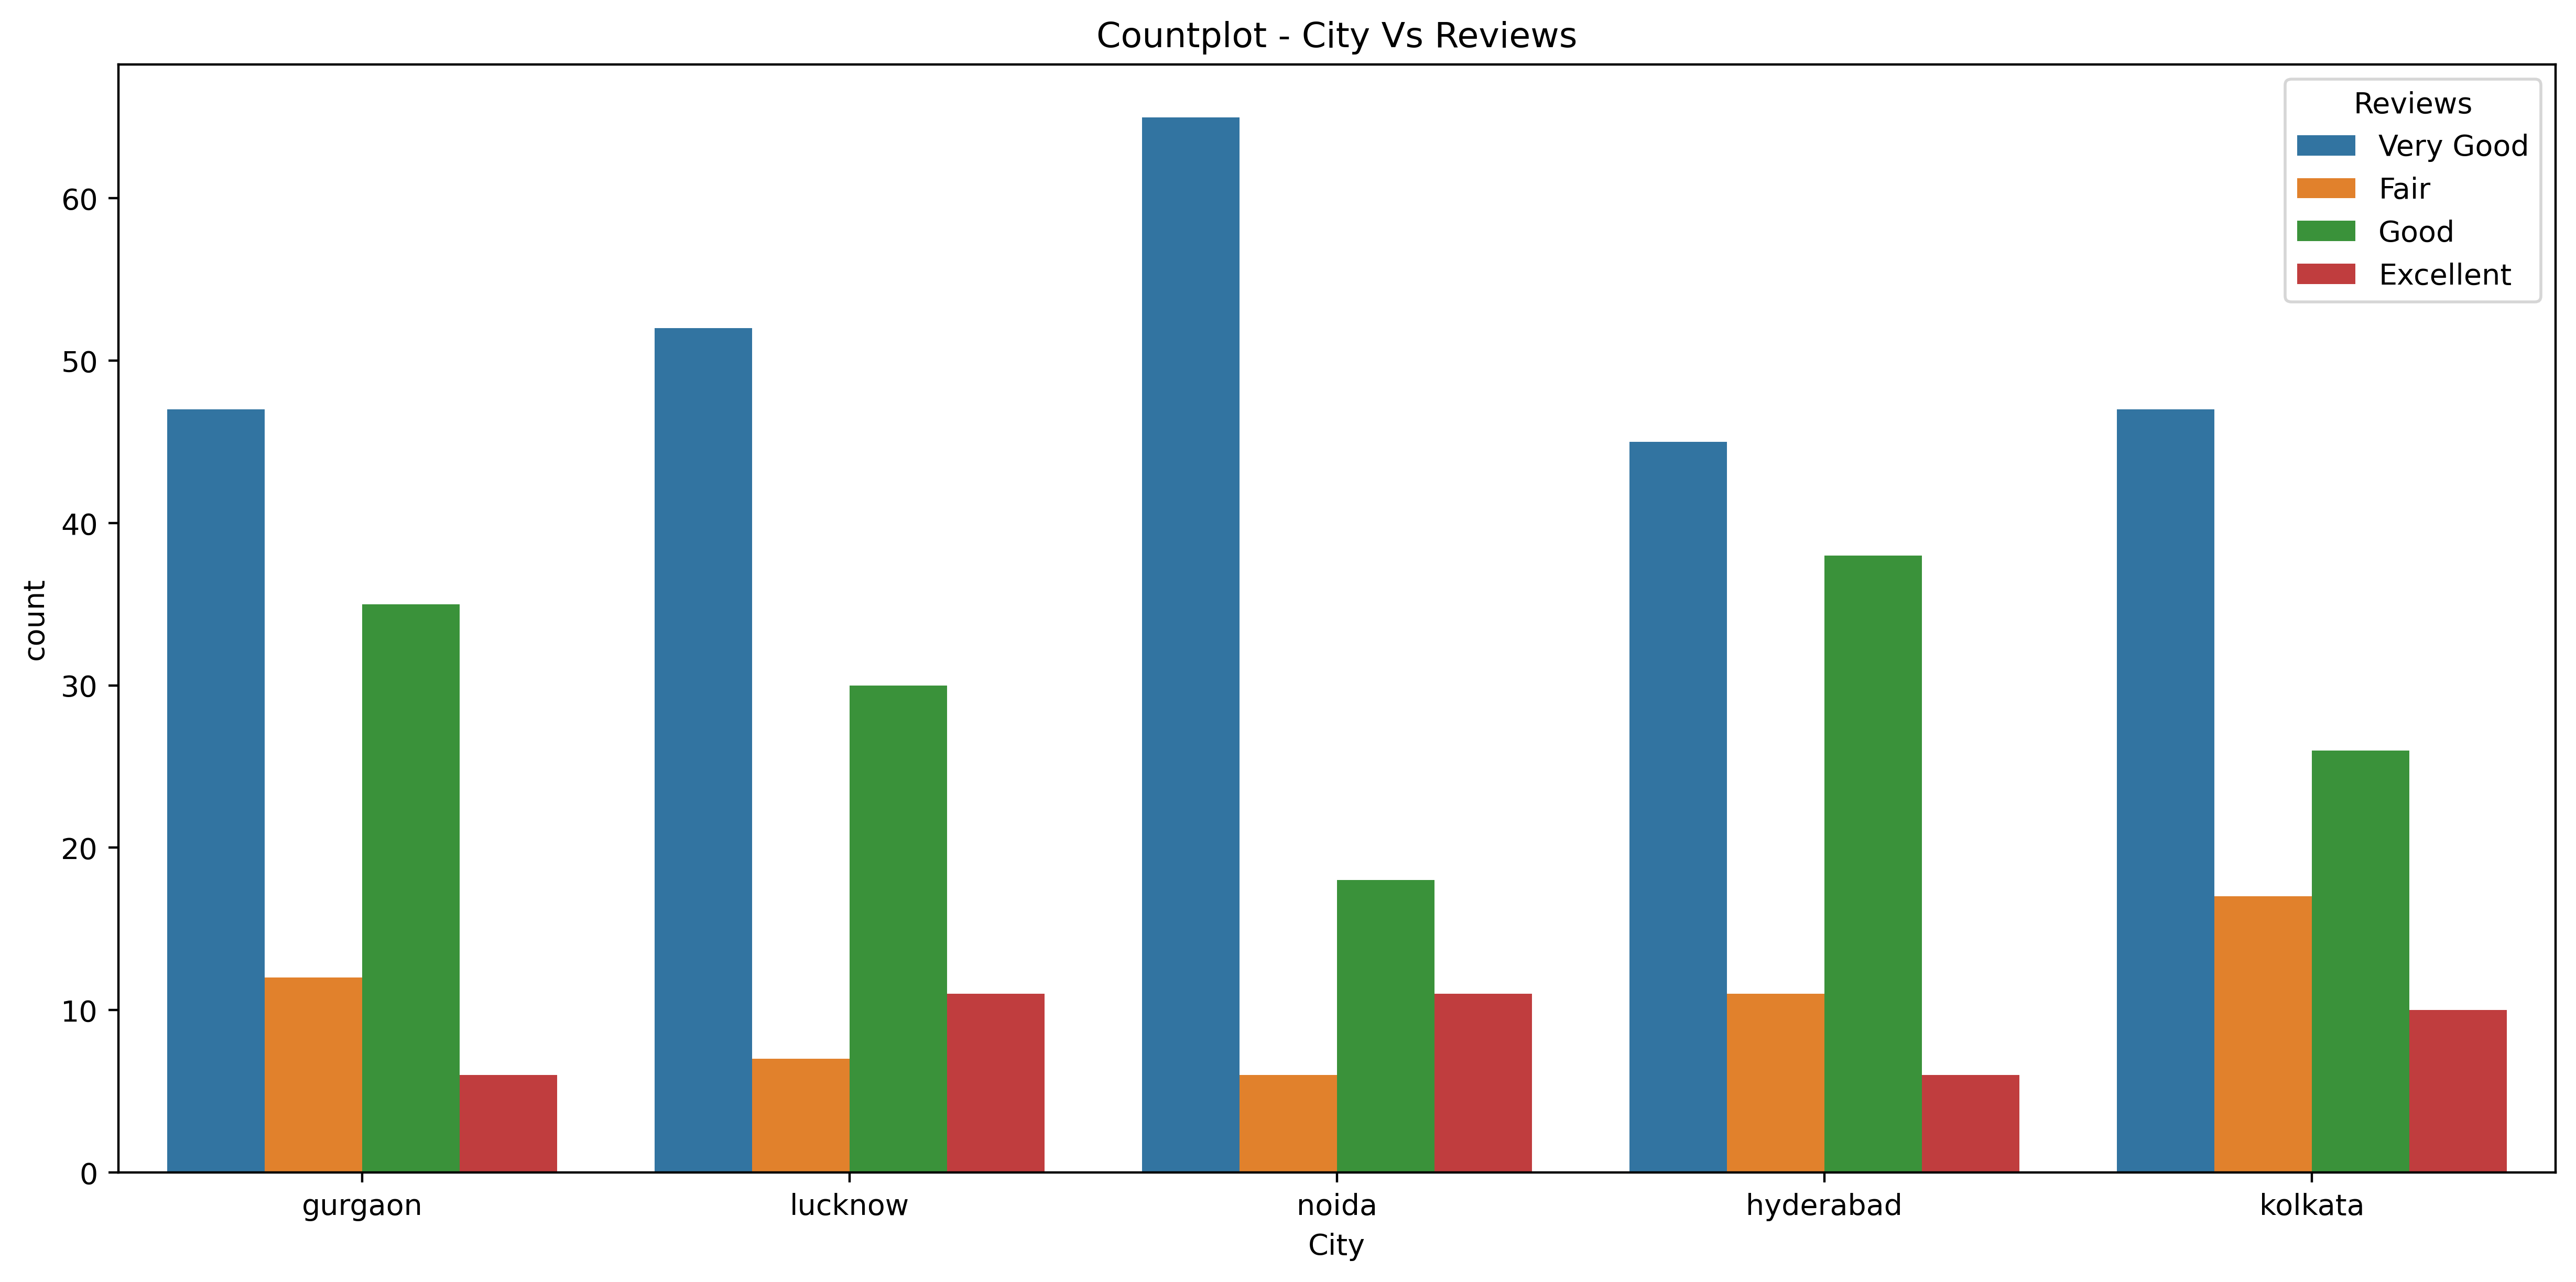

In [237]:
plt.figure(figsize=(15,7),dpi=200)
sns.countplot(x="City",hue="Reviews",data=Data)
plt.title("Countplot - City Vs Reviews");

In [236]:
# Count plot reveals that in every city, maximum customers reviewed OYO hotels to be 'Very Good', followed by 'Good'. 

## Multivariate Analysis


### Pair Plot

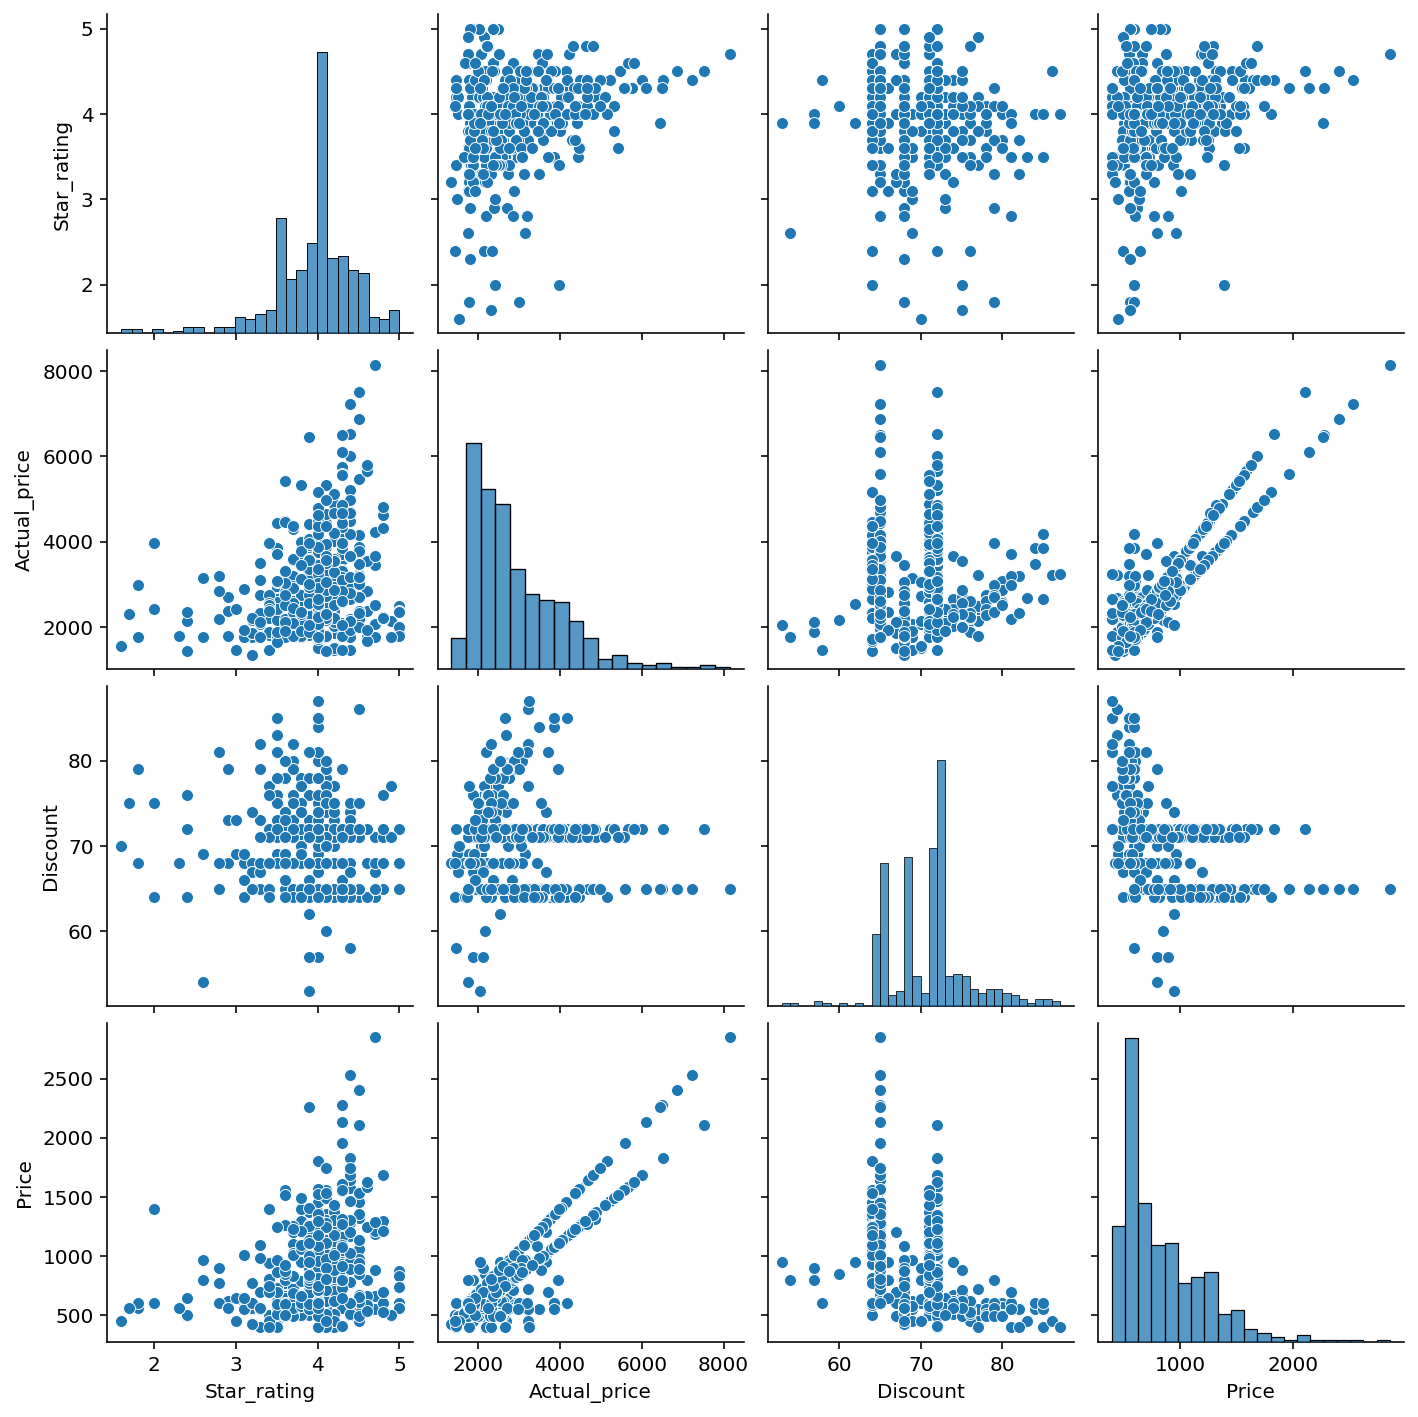

In [238]:
sns.pairplot(Data);

### Heatmap

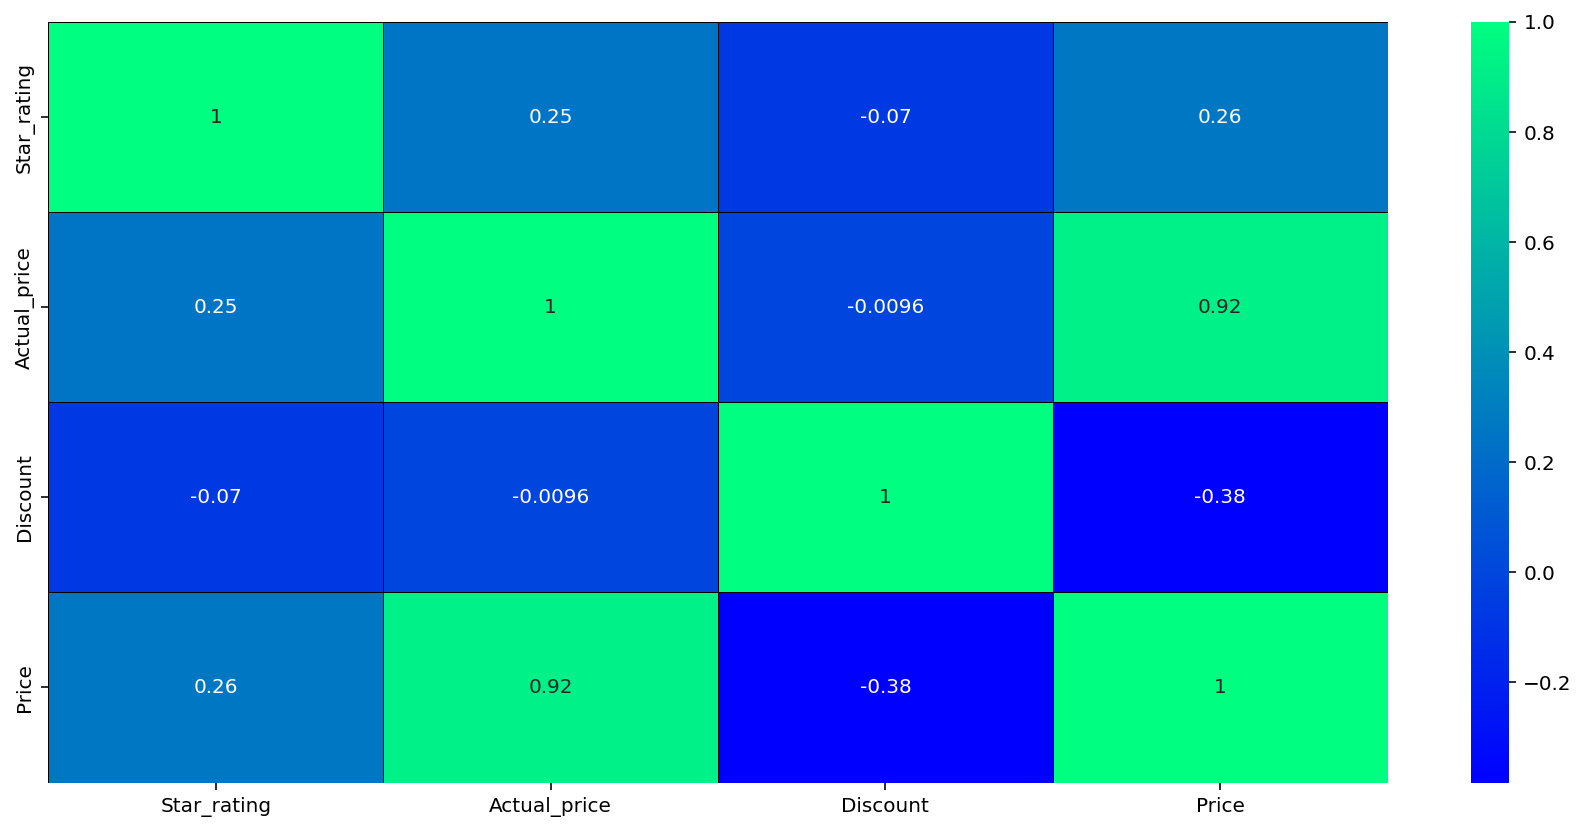

In [60]:
i=Data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(i, annot=True, linewidths=0.5,cmap='winter', linecolor='black');

In [61]:
# Visible positive corelation Price and Actual_price

## CODE TO FILTER OYO HOTEL OF CHOICE

In [105]:
city=input('Enter your city of choice: ')
rating= float(input("Enter your desired rating: "))
price=int(input("Enter your desired price: "))
Data[(Data.City==city) & (Data.Star_rating>=rating) & (Data.Price<=price)]

Enter your city of choice: hyderabad
Enter your desired rating: 4
Enter your desired price: 1000


,City,Hotel_name,Location,Reviews,Star_rating,Actual_price,Discount,Price
300,hyderabad,OYO 14669 Mayur's Residency,"Near Sri Krupa Market, Malakpet, Hyderabad",Fair,4.0,2618,78,554
304,hyderabad,OYO 49253 Raja Residency,"Near Raja Deluxe Complex, Musheerabad, Hyderabad",Good,4.2,3102,71,869
305,hyderabad,OYO Flagship 702702 Hotel Akshaya Residency,"Hyderabad, Hyderabad",Very Good,4.6,1922,72,538
306,hyderabad,OYO 6651 Hotel Srujana Stay Inn,"Nampally, Hyderabad",Good,4.0,2539,72,711
307,hyderabad,OYO HYD1516 Hotel Aroma Classic,"Ghosha Mahal, Hyderabad",Good,4.1,2205,76,513
308,hyderabad,OYO 24204 Nav Bharath Residency,"Near Central Gurudwara Saheb, Gowliguda, Hyder...",Good,4.3,3168,72,887
313,hyderabad,OYO 17168 Hz Lodge,"Near Julu Khana Parking, Charminar, Hyderabad",Good,4.1,2858,75,714
315,hyderabad,OYO 86305 Hotel Aroma Classic,15-1-309 Feelkhana Near Acharaya Bhavan Baba R...,Very Good,4.0,3242,87,399
325,hyderabad,OYO 22907 Hotel Holiday,"M.G Road, Near Rani Gunj X road, Opp. Punjab N...",Very Good,4.2,2942,71,824
340,hyderabad,Flagship 76333 Relax Grand,"Secunderabad Mandal, Hyderabad",Good,4.0,2625,72,735
